In [1]:
import sys
sys.path.append('../src')
from Mapping import *
from PCA import *

import pickle
import matplotlib
import matplotlib.pyplot as plt

In [2]:
V5 = pickle.load(open('../data/V5.p','rb'))
cp_list = V5["cp_list"]
active_L_table_slide_DOA = V5["active_L_table_slide_DOA"]
active_L_table_slide_matrix = V5["active_L_table_slide_matrix"]
active_long_table_slide_DOA = V5["active_long_table_slide_DOA"]
active_long_table_slide_matrix = V5["active_long_table_slide_matrix"]

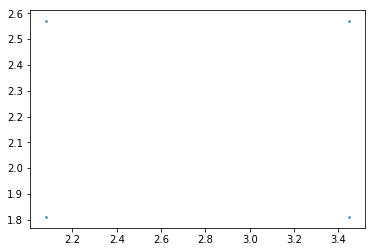

In [3]:
room_x = [i[0] for i in ROOM_COORDINATES[:4]]
room_y = [i[1] for i in ROOM_COORDINATES[:4]]
plt.scatter(room_x, room_y, s=2)

In [4]:
import torch
import torch.nn as nn
import random

In [5]:
input_size = 15
output_size = 2
hidden_size = 200
num_epochs = 2
learning_rate = 0.001

In [6]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output = self.l1(x)
        output = self.relu(output)
        output = self.l2(output)
        return output
    

In [7]:
model = NeuralNet(input_size, hidden_size, output_size)
model = model.float()

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# first four are table coordinates
cp_torch = [torch.from_numpy(cp) for cp in cp_list[:4]]
room_coords = [torch.from_numpy(np.array([i[0], i[1]])) for i in ROOM_COORDINATES[:4]]

In [10]:
X = cp_torch
y = room_coords

In [11]:
for i in range(10000):
    for x_i, y_i in zip(X, y):
    
        outputs = model(x_i.float())
        loss = criterion(outputs, y_i.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        print(loss.item())

C:\Users\kazzh\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([399, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


3.8923380374908447


C:\Users\kazzh\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([300, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


7.106510639190674


C:\Users\kazzh\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([500, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


8.421313285827637
4.932160377502441
3.2798988819122314
6.289013862609863
7.530805587768555
4.302820682525635
2.7536613941192627
5.568138122558594
6.738943099975586
3.7525341510772705
2.3011045455932617
4.93097448348999
6.032923221588135
3.2708232402801514
1.9121735095977783
4.367015361785889
5.402369499206543
2.8490700721740723
1.5785950422286987
3.867541551589966
4.838685035705566
2.4800467491149902
1.2934160232543945
3.425201892852783
4.334613800048828
2.157592535018921
1.050681710243225
3.033724308013916
3.88389253616333
1.8763436079025269
0.8451792597770691
2.687605381011963
3.481078863143921
1.6316310167312622
0.672343909740448
2.3820321559906006
3.121344566345215
1.4192993640899658
0.5281050801277161
2.1126770973205566
2.800370216369629
1.2356239557266235
0.4088107943534851
1.875644326210022
2.5142407417297363
1.07724130153656
0.3111962676048279
1.6673789024353027
2.2594211101531982
0.9411324262619019
0.23232445120811462
1.4846916198730469
2.0326976776123047
0.8245747089385986
0.

0.16062793135643005
0.16700594127178192
0.16864211857318878
0.14625544846057892
0.15973544120788574
0.16614645719528198
0.16777823865413666
0.1454189568758011
0.15884791314601898
0.16529043018817902
0.16691912710666656
0.14458876848220825
0.15796492993831635
0.16443775594234467
0.16606521606445312
0.14376449584960938
0.1570870280265808
0.16358859837055206
0.1652161180973053
0.1429460495710373
0.15621377527713776
0.16274330019950867
0.16437187790870667
0.14213337004184723
0.1553453654050827
0.1619015634059906
0.16353242099285126
0.14132635295391083
0.15448184311389923
0.16106368601322174
0.1626976728439331
0.14052487909793854
0.15362311899662018
0.16022969782352448
0.16186775267124176
0.13972873985767365
0.1527690440416336
0.15939955413341522
0.16104258596897125
0.13893800973892212
0.15191985666751862
0.15857340395450592
0.16022199392318726
0.138152614235878
0.15107539296150208
0.15775130689144135
0.15940602123737335
0.13737241923809052
0.15023568272590637
0.15693320333957672
0.15859475

0.10128474980592728
0.0833624005317688
0.09057871252298355
0.09770718216896057
0.10080725699663162
0.0829339325428009
0.09009317308664322
0.0972147211432457
0.1003325879573822
0.08250840753316879
0.08961072564125061
0.09672509133815765
0.09986066073179245
0.08208563178777695
0.08913110196590424
0.09623825550079346
0.09939153492450714
0.08166557550430298
0.08865443617105484
0.09575410932302475
0.09892504662275314
0.0812482088804245
0.08818067610263824
0.09527281671762466
0.09846124053001404
0.08083358407020569
0.08770975470542908
0.09479421377182007
0.09800007194280624
0.08042167872190475
0.08724179863929749
0.09431822597980499
0.09754152595996857
0.08001246303319931
0.08677644282579422
0.09384503215551376
0.09708573669195175
0.07960593700408936
0.08631398528814316
0.0933743342757225
0.09663252532482147
0.07920212298631668
0.08585435152053833
0.0929064080119133
0.096181720495224
0.07880090922117233
0.08539750427007675
0.09244109690189362
0.09573353081941605
0.0784023329615593
0.08494339

0.05365678295493126
0.0595305971801281
0.06411723047494888
0.05129903182387352
0.05339827761054039
0.05925612151622772
0.06385393440723419
0.05108339712023735
0.05314129963517189
0.05898318439722061
0.06359213590621948
0.05086921527981758
0.05288594216108322
0.05871180072426796
0.06333176046609879
0.05065649747848511
0.05263214185833931
0.058441925793886185
0.06307294964790344
0.05044509097933769
0.05237994343042374
0.058173663914203644
0.0628155991435051
0.05023512244224548
0.052129194140434265
0.057906847447156906
0.06255979090929031
0.05002652108669281
0.051879920065402985
0.05764155834913254
0.06230546906590462
0.04981926083564758
0.05163232609629631
0.05737786367535591
0.06205267459154129
0.049613360315561295
0.051386166363954544
0.05711563304066658
0.06180117279291153
0.049408916383981705
0.0511416494846344
0.056854892522096634
0.06155116483569145
0.049205780029296875
0.05089861899614334
0.05659559369087219
0.06130257248878479
0.049003973603248596
0.050657015293836594
0.056337766

0.034086957573890686
0.03830550238490105
0.043767355382442474
0.0352802500128746
0.03394583985209465
0.038148436695337296
0.04361599683761597
0.035167161375284195
0.03380545228719711
0.03799227997660637
0.043465420603752136
0.03505465388298035
0.033665891736745834
0.037836913019418716
0.043315645307302475
0.0349428728222847
0.03352710232138634
0.037682391703128815
0.04316658899188042
0.03483184799551964
0.033389173448085785
0.037528663873672485
0.04301835224032402
0.03472144901752472
0.03325199708342552
0.03737581521272659
0.04287092760205269
0.034611716866493225
0.03311557695269585
0.03722371160984039
0.04272424057126045
0.03450259193778038
0.03297992795705795
0.037072453647851944
0.0425783172249794
0.03439420461654663
0.03284505382180214
0.036921996623277664
0.04243311285972595
0.034286417067050934
0.032710958272218704
0.03677230328321457
0.04228869453072548
0.03417929634451866
0.03257765248417854
0.03662339970469475
0.042145002633333206
0.03407285362482071
0.03244510293006897
0.0364

0.025993844494223595
0.031803879886865616
0.026641471311450005
0.023114677518606186
0.025898782536387444
0.031710460782051086
0.02657623589038849
0.02303244359791279
0.025804221630096436
0.031617421656847
0.026511332020163536
0.022950610145926476
0.02571006491780281
0.031524863094091415
0.026446782052516937
0.022869177162647247
0.0256163589656353
0.031432729214429855
0.0263825710862875
0.022788193076848984
0.02552306093275547
0.031341131776571274
0.026318717747926712
0.022707602009177208
0.0254302266985178
0.031249886378645897
0.02625512145459652
0.022627413272857666
0.025337819010019302
0.03115907311439514
0.02619188278913498
0.02254761941730976
0.025245828554034233
0.031068703159689903
0.026129022240638733
0.02246830053627491
0.02515430562198162
0.03097878210246563
0.026066401973366737
0.022389307618141174
0.025063201785087585
0.030889304354786873
0.026004161685705185
0.02231076918542385
0.02497251145541668
0.030800215899944305
0.025942238047719002
0.022232549265027046
0.024882214143

0.024349048733711243
0.021524708718061447
0.01664767414331436
0.018345722928643227
0.024288572371006012
0.02148355543613434
0.01659618318080902
0.018284879624843597
0.024228302761912346
0.021442515775561333
0.016544872894883156
0.018224284052848816
0.02416827529668808
0.02140163630247116
0.01649380661547184
0.01816394552588463
0.02410847134888172
0.021360917016863823
0.016442906111478806
0.01810382679104805
0.02404892072081566
0.021320339292287827
0.01639225333929062
0.018043991178274155
0.02398955635726452
0.02127988450229168
0.01634179800748825
0.01798436976969242
0.023930424824357033
0.021239573135972023
0.01629151590168476
0.017924977466464043
0.02387152425944805
0.021199457347393036
0.01624147966504097
0.01786584034562111
0.02381283789873123
0.021159423515200615
0.016191644594073296
0.017806919291615486
0.02375437319278717
0.021119525656104088
0.01614200510084629
0.017748234793543816
0.023696117103099823
0.02107974886894226
0.016092553734779358
0.017689788714051247
0.0236380789428

0.01929822936654091
0.018021611496806145
0.01241327729076147
0.013319198042154312
0.01925540529191494
0.01799098029732704
0.012377985753118992
0.01327704917639494
0.01921272650361061
0.017960410565137863
0.012342852540314198
0.013235040009021759
0.019170181825757027
0.017929887399077415
0.012307817116379738
0.01319316029548645
0.019127778708934784
0.017899470403790474
0.012272905558347702
0.013151461258530617
0.019085535779595375
0.0178691316395998
0.012238143011927605
0.013109893538057804
0.01904340460896492
0.01783888228237629
0.012203484773635864
0.013068430125713348
0.01900140568614006
0.017808711156249046
0.012168942019343376
0.01302714366465807
0.018959537148475647
0.017778612673282623
0.012134560383856297
0.01298598013818264
0.018917802721261978
0.01774859055876732
0.012100288644433022
0.012944964691996574
0.0188762117177248
0.017718616873025894
0.012066110968589783
0.012904101051390171
0.018834751099348068
0.01768871769309044
0.012032083235681057
0.012863382697105408
0.01879341

0.009791817516088486
0.015647897496819496
0.01530878059566021
0.009457146748900414
0.009761478751897812
0.015616264194250107
0.015284283086657524
0.009432139806449413
0.009731249883770943
0.015584704466164112
0.015259859152138233
0.00940726324915886
0.009701144881546497
0.015553218312561512
0.015235530212521553
0.00938247237354517
0.009671135805547237
0.015521812252700329
0.015211215242743492
0.009357782080769539
0.00964126642793417
0.015490503050386906
0.015186961740255356
0.009333177469670773
0.00961148552596569
0.015459254384040833
0.015162761323153973
0.009308659471571445
0.009581808000802994
0.015428109094500542
0.0151386559009552
0.009284201078116894
0.009552251547574997
0.015397054143249989
0.015114566311240196
0.009259859099984169
0.009522787295281887
0.015366096049547195
0.015090515837073326
0.009235591627657413
0.00949343666434288
0.01533522643148899
0.01506655104458332
0.009211402386426926
0.009464183822274208
0.01530440617352724
0.015042607672512531
0.009187313728034496
0.0

0.01292515266686678
0.013130697421729565
0.0073754796758294106
0.007233076728880405
0.012900903820991516
0.013110512867569923
0.0073575847782194614
0.007211166433990002
0.012876740656793118
0.013090359047055244
0.007339762058109045
0.007189333438873291
0.012852643616497517
0.013070215471088886
0.007321998476982117
0.007167560048401356
0.012828589417040348
0.013050107285380363
0.007304289378225803
0.007145852781832218
0.012804605066776276
0.013030069880187511
0.007286649663001299
0.007124204188585281
0.0127806905657053
0.013010038062930107
0.007269037421792746
0.007102624513208866
0.01275683380663395
0.012990040704607964
0.007251508068293333
0.0070811184123158455
0.012733045034110546
0.01297010388225317
0.007234032265841961
0.00705967890098691
0.01270932238548994
0.012950174510478973
0.007216618862003088
0.0070382971316576
0.012685663066804409
0.012930264696478844
0.0071992590092122555
0.007016981951892376
0.012662077322602272
0.01291043870151043
0.0071819559670984745
0.0069957450032234

0.005388504359871149
0.010829099453985691
0.011307336390018463
0.005874435883015394
0.0053721340373158455
0.010810361243784428
0.011290233582258224
0.005861454643309116
0.005355813540518284
0.010791650041937828
0.011273129843175411
0.005848495289683342
0.005339536350220442
0.010772968642413616
0.011256068013608456
0.00583560299128294
0.0053232936188578606
0.010754340328276157
0.01123906672000885
0.005822751671075821
0.005307091400027275
0.010735763236880302
0.011222057044506073
0.0058099376037716866
0.0052909450605511665
0.010717229917645454
0.011205091141164303
0.005797162186354399
0.0052748508751392365
0.010698751546442509
0.0111881447955966
0.005784421693533659
0.005258799064904451
0.010680322535336018
0.011171219870448112
0.005771727301180363
0.005242806859314442
0.010661953128874302
0.011154334992170334
0.005759085528552532
0.005226852372288704
0.010643609799444675
0.011137442663311958
0.005746464245021343
0.005210955161601305
0.010625320486724377
0.01112060621380806
0.00573388161

0.004790876992046833
0.003990070428699255
0.009195676073431969
0.009756273590028286
0.004781373310834169
0.00397775461897254
0.009180931374430656
0.009741714224219322
0.004771906416863203
0.003965478856116533
0.009166231378912926
0.009727138094604015
0.004762470256537199
0.003953238017857075
0.009151571430265903
0.009712623432278633
0.00475306436419487
0.003941037692129612
0.009136932902038097
0.009698105975985527
0.004743692930787802
0.003928869962692261
0.00912232231348753
0.009683648124337196
0.004734348505735397
0.003916739020496607
0.009107759222388268
0.009669176302850246
0.0047250352799892426
0.0039046432357281446
0.009093227796256542
0.009654759429395199
0.004715749528259039
0.0038925812114030123
0.009078734554350376
0.009640324860811234
0.004706495441496372
0.003880553413182497
0.009064281359314919
0.009625961072742939
0.004697275348007679
0.003868554951623082
0.009049849584698677
0.009611587971448898
0.004688084591180086
0.0038565872237086296
0.009035445749759674
0.0095972791

0.0029500292148441076
0.007914767600595951
0.008449933491647243
0.003993292339146137
0.0029407967813313007
0.007902977056801319
0.008437540382146835
0.0039863986894488335
0.0029315908905118704
0.007891221903264523
0.008425157517194748
0.003979544620960951
0.002922416664659977
0.007879498414695263
0.008412803523242474
0.003972714301198721
0.0029132640920579433
0.00786779634654522
0.008400464430451393
0.0039658937603235245
0.002904146444052458
0.00785612128674984
0.0083881551399827
0.003959110006690025
0.00289504649117589
0.007844452746212482
0.008375891484320164
0.003952342085540295
0.0028859807644039392
0.007832822389900684
0.008363618515431881
0.003945596050471067
0.0028769413474947214
0.007821224629878998
0.008351373486220837
0.003938879817724228
0.002867929870262742
0.0078096333891153336
0.008339153602719307
0.00393217708915472
0.002858937019482255
0.007798084989190102
0.008326970972120762
0.003925500903278589
0.002849981188774109
0.007786562666296959
0.008314773440361023
0.00391884

0.007351867388933897
0.0034275345969945192
0.002173993270844221
0.006884950678795576
0.007341345772147179
0.003422557143494487
0.0021671559661626816
0.006875429768115282
0.007330867927521467
0.0034175971522927284
0.002160327974706888
0.006865925621241331
0.00732041010633111
0.0034126536920666695
0.00215352070517838
0.006856449414044619
0.007309937383979559
0.0034077258314937353
0.00214673625305295
0.0068469904363155365
0.007299513090401888
0.003402816131711006
0.002139977877959609
0.00683754775673151
0.007289075758308172
0.00339792063459754
0.0021332355681806803
0.0068281302228569984
0.007278689183294773
0.0033930449280887842
0.002126523293554783
0.006818727590143681
0.007268312852829695
0.003388181561604142
0.0021198326721787453
0.006809357088059187
0.007257925812155008
0.0033833372872322798
0.002113156486302614
0.006799998227506876
0.007247592322528362
0.0033785104751586914
0.002106498694047332
0.006790661718696356
0.007237271871417761
0.0033737008925527334
0.002099868841469288
0.006

0.0030204742215573788
0.0016072271391749382
0.006056891288608313
0.006413055583834648
0.0030169165693223476
0.0016022081254050136
0.006049113813787699
0.0064041828736662865
0.0030133682303130627
0.0015972019173204899
0.006041350308805704
0.006395335774868727
0.0030098408460617065
0.0015922125894576311
0.0060335975140333176
0.006386491935700178
0.0030063167214393616
0.0015872386284172535
0.006025866139680147
0.006377669516950846
0.0030028175096958876
0.0015822791028767824
0.006018130574375391
0.00636887364089489
0.0029993269126862288
0.0015773434424772859
0.006010431796312332
0.006360089406371117
0.0029958398081362247
0.0015724195400252938
0.0060027469880878925
0.00635128328576684
0.0029923676047474146
0.0015675178728997707
0.005995067767798901
0.00634252792224288
0.0029889203142374754
0.001562623307108879
0.0059874169528484344
0.006333781871944666
0.002985471161082387
0.0015577516751363873
0.00597977451980114
0.006325054913759232
0.0029820362105965614
0.0015528984367847443
0.0059721567

0.005637243390083313
0.0027317912317812443
0.001194641925394535
0.00537725817412138
0.005629751831293106
0.0027292934246361256
0.001191023737192154
0.00537085672840476
0.005622275173664093
0.0027267979457974434
0.0011874123010784388
0.005364449229091406
0.0056148129515349865
0.002724312711507082
0.001183822168968618
0.005358070135116577
0.005607350263744593
0.0027218402829021215
0.0011802369263023138
0.005351688247174025
0.005599914584308863
0.0027193804271519184
0.001176666235551238
0.005345329642295837
0.005592491012066603
0.0027169252280145884
0.0011731053236871958
0.005338979419320822
0.005585077218711376
0.0027144753839820623
0.0011695644352585077
0.0053326464258134365
0.005577679257839918
0.002712043235078454
0.0011660268064588308
0.005326321814209223
0.0055702985264360905
0.002709618303924799
0.0011625067563727498
0.005320011638104916
0.005562928505241871
0.0027071970980614424
0.0011590003268793225
0.005313702393323183
0.005555571056902409
0.0027047963812947273
0.001155501464381

0.004975737072527409
0.0025305424351245165
0.0008999590063467622
0.004814965650439262
0.004969432950019836
0.0025288229808211327
0.0008973937947303057
0.004809634760022163
0.004963126499205828
0.0025271049235016108
0.0008948476752266288
0.0048043252900242805
0.004956833086907864
0.0025253931526094675
0.0008923113928176463
0.004799014888703823
0.004950554110109806
0.002523684874176979
0.000889786402694881
0.004793723113834858
0.0049442872405052185
0.0025219919625669718
0.0008872691541910172
0.004788429941982031
0.004938025958836079
0.0025202990509569645
0.0008847618009895086
0.0047831605188548565
0.004931776784360409
0.002518612425774336
0.0008822629461064935
0.004777888767421246
0.004925544839352369
0.0025169402360916138
0.000879770377650857
0.004772638436406851
0.0049193250015378
0.002515270374715328
0.0008772846194915473
0.004767380189150572
0.004913122393190861
0.002513608429580927
0.000874812831170857
0.0047621456906199455
0.004906917456537485
0.0025119527708739042
0.00087234948296

0.0043508131057024
0.004418266471475363
0.002393370494246483
0.0006943564512766898
0.004346346948295832
0.004412945359945297
0.0023922123946249485
0.0006926004425622523
0.004341891501098871
0.004407639615237713
0.00239106104709208
0.0006908494397066534
0.004337436519563198
0.004402338992804289
0.002389913657680154
0.0006891064113005996
0.004332995042204857
0.004397051874548197
0.0023887695278972387
0.0006873728707432747
0.004328570794314146
0.004391767550259829
0.0023876302875578403
0.0006856435793451965
0.004324138630181551
0.004386491607874632
0.0023865019902586937
0.0006839224952273071
0.004319726023823023
0.004381230100989342
0.002385374391451478
0.0006822092109359801
0.004315319005399942
0.0043759774416685104
0.0023842514492571354
0.0006804995937272906
0.0043109143152832985
0.0043707299046218395
0.0023831308353692293
0.0006788019672967494
0.0043065245263278484
0.004365492612123489
0.0023820167407393456
0.0006771095795556903
0.004302135668694973
0.004360269755125046
0.0023809103295

0.002303424058482051
0.0005564347957260907
0.003956791013479233
0.003948221914470196
0.0023026694543659687
0.0005552637740038335
0.0039530349895358086
0.003943734336644411
0.002301919274032116
0.0005540973506867886
0.003949272446334362
0.00393925653770566
0.0023011716548353434
0.0005529379122890532
0.003945532254874706
0.003934783395379782
0.0023004247341305017
0.0005517829558812082
0.003941797651350498
0.003930313978344202
0.0022996878251433372
0.0005506324814632535
0.003938058856874704
0.003925865516066551
0.002298952080309391
0.0005494860815815628
0.003934332635253668
0.0039214156568050385
0.0022982170339673758
0.0005483496352098882
0.003930608741939068
0.003916962072253227
0.002297485014423728
0.0005472144694067538
0.0039268857799470425
0.0039125303737819195
0.0022967553231865168
0.0005460857064463198
0.0039231786504387856
0.003908108454197645
0.002296032151207328
0.0005449613672681153
0.003919477574527264
0.0039036916568875313
0.0022953131701797247
0.0005438424414023757
0.00391578

0.0035587805323302746
0.0022458890452980995
0.00046646909322589636
0.0036271095741540194
0.0035549525637179613
0.002245422452688217
0.0004657252866309136
0.003623914672061801
0.003551150904968381
0.002244956325739622
0.0004649862239602953
0.0036207253579050303
0.0035473580937832594
0.0022444911301136017
0.00046424963511526585
0.0036175325512886047
0.003543573198840022
0.002244030125439167
0.00046351924538612366
0.003614360000938177
0.0035397897008806467
0.0022435691207647324
0.00046279325033538043
0.003611187217757106
0.0035359945613890886
0.002243109978735447
0.0004620682739187032
0.0036080225836485624
0.0035322285257279873
0.002242655260488391
0.00046134981676004827
0.0036048635374754667
0.0035284641198813915
0.002242204500362277
0.0004606350848916918
0.003601705189794302
0.0035247125197201967
0.002241754438728094
0.0004599216626957059
0.003598554991185665
0.0035209485795348883
0.0022413076367229223
0.00045921411947347224
0.0035954101476818323
0.00351719674654305
0.002240862697362899

0.0032275549601763487
0.002211428014561534
0.00041169970063492656
0.003348835278302431
0.0032243169844150543
0.002211155602708459
0.00041126241558231413
0.003346096258610487
0.0032210834324359894
0.0022108841221779585
0.00041082740062847733
0.003343357238918543
0.0032178517431020737
0.0022106149699538946
0.00041039325878955424
0.0033406249713152647
0.003214614698663354
0.0022103453520685434
0.00040996403549797833
0.0033379055093973875
0.003211401170119643
0.002210078528150916
0.00040953780990093946
0.0033351846504956484
0.0032081843819469213
0.0022098124027252197
0.00040911397081799805
0.0033324663527309895
0.0032049589790403843
0.0022095502354204655
0.00040869173244573176
0.0033297576010227203
0.003201759420335293
0.002209288766607642
0.0004082716768607497
0.0033270493149757385
0.0031985612586140633
0.0022090296261012554
0.0004078556376043707
0.003324346849694848
0.0031953472644090652
0.002208770951256156
0.0004074418393429369
0.0033216564916074276
0.0031921572517603636
0.002208513673

0.0029449525754898787
0.0021924139000475407
0.0003811173955909908
0.0031094264704734087
0.0029421686194837093
0.0021922762971371412
0.00038089253939688206
0.003107065334916115
0.0029394025914371014
0.00219213985837996
0.00038067108835093677
0.0031047090888023376
0.0029366433154791594
0.002192004816606641
0.0003804505104199052
0.0031023421324789524
0.0029338751919567585
0.0021918718703091145
0.00038023191154934466
0.0030999984592199326
0.002931114984676242
0.0021917393896728754
0.00038001517532393336
0.0030976522248238325
0.002928350819274783
0.0021916069090366364
0.0003798003599513322
0.0030953085515648127
0.0029256041161715984
0.002191476756706834
0.00037958708708174527
0.0030929718632251024
0.002922849263995886
0.002191345440223813
0.00037937593879178166
0.0030906328465789557
0.002920114900916815
0.0021912159863859415
0.00037916720611974597
0.003088297788053751
0.002917373552918434
0.0021910888608545065
0.0003789587935898453
0.003085972974076867
0.002914645243436098
0.002190963830798

0.002702630590647459
0.0021837393287569284
0.00036725366953760386
0.0029022181406617165
0.0027002361603081226
0.0021836860105395317
0.0003671780286822468
0.002900161547586322
0.002697853371500969
0.002183634787797928
0.00036709976848214865
0.0028981135692447424
0.0026954791974276304
0.0021835840307176113
0.00036702302168123424
0.0028960604686290026
0.002693098969757557
0.0021835346706211567
0.00036694726441055536
0.002894010627642274
0.002690740628167987
0.002183486707508564
0.00036687409738078713
0.002891973126679659
0.002688364591449499
0.0021834338549524546
0.0003668009303510189
0.002889938885346055
0.0026860071811825037
0.002183385891839862
0.0003667290438897908
0.0028879009187221527
0.0026836455799639225
0.0021833365317434072
0.0003666583797894418
0.0028858708683401346
0.002681281417608261
0.002183291595429182
0.0003665884432848543
0.0028838440775871277
0.0026789403054863214
0.002183245262131095
0.00036651792470365763
0.002881815657019615
0.0026765831280499697
0.002183200325816869

0.002493971725925803
0.0021813150960952044
0.0003644002426881343
0.002721569500863552
0.0024919083807617426
0.002181312767788768
0.00036441252450458705
0.0027197750750929117
0.0024898466654121876
0.0021813130006194115
0.00036442477721720934
0.0027179818134754896
0.002487790072336793
0.002181312534958124
0.0003644402022473514
0.002716192975640297
0.002485748380422592
0.002181309973821044
0.00036445618025027215
0.0027144020423293114
0.0024837057571858168
0.0021813111379742622
0.000364471081411466
0.0027126155328005552
0.0024816561490297318
0.002181309973821044
0.00036448545870371163
0.002710837870836258
0.0024796142242848873
0.0021813111379742622
0.000364501349395141
0.0027090494986623526
0.002477583708241582
0.0021813141647726297
0.00036451738560572267
0.0027072725351899862
0.0024755438789725304
0.0021813150960952044
0.0003645345859695226
0.0027055013924837112
0.0024735063780099154
0.00218131928704679
0.00036455405643209815
0.002703725127503276
0.00247147842310369
0.002181320684030652
0

0.002313449280336499
0.002182505326345563
0.0003682963433675468
0.0025629187002778053
0.002311665564775467
0.002182530704885721
0.000368363136658445
0.002561327302828431
0.0023098839446902275
0.0021825560834258795
0.00036843010457232594
0.0025597477797418833
0.0023081032559275627
0.0021825828589498997
0.0003684962575789541
0.0025581647641956806
0.002306324662640691
0.002182606840506196
0.0003685638657771051
0.00255658570677042
0.002304547466337681
0.002182629192247987
0.00036863103741779923
0.0025550080463290215
0.002302776789292693
0.002182653406634927
0.0003686995478346944
0.0025534380692988634
0.0023010082077234983
0.002182678086683154
0.00036876756348647177
0.002551860176026821
0.0022992382291704416
0.0021827039308845997
0.0003688362194225192
0.002550296951085329
0.0022974687162786722
0.00218273070640862
0.0003689044388011098
0.002548732329159975
0.002295704325661063
0.002182756317779422
0.0003689730947371572
0.0025471665430814028
0.0022939390037208796
0.0021827812306582928
0.00036

0.002185364020988345
0.0003759695100598037
0.0024226775858551264
0.0021547661162912846
0.002185396384447813
0.000376064155716449
0.002421273849904537
0.0021532115060836077
0.002185432007536292
0.0003761572588700801
0.0024198731407523155
0.0021516529377549887
0.0021854639053344727
0.0003762510314118117
0.0024184780195355415
0.0021501013543456793
0.002185497432947159
0.00037634477484971285
0.0024170824326574802
0.0021485479082912207
0.0021855300292372704
0.00037643773248419166
0.0024156891740858555
0.002147001214325428
0.002185563324019313
0.0003765323490370065
0.0024142928887158632
0.002145452657714486
0.0021855970844626427
0.00037662609247490764
0.002412904519587755
0.002143900142982602
0.0021856315433979034
0.00037671966128982604
0.0024115133564919233
0.0021423534490168095
0.0021856653038412333
0.0003768138703890145
0.002410127781331539
0.0021408123429864645
0.002185700461268425
0.00037690880708396435
0.0024087391793727875
0.002139274962246418
0.0021857318934053183
0.00037700441316701

0.002188431564718485
0.00038527435390278697
0.002297942293807864
0.0020175310783088207
0.0021884609013795853
0.0003853767120745033
0.002296686638146639
0.002016152488067746
0.0021884918678551912
0.00038547831354662776
0.002295431913807988
0.002014793688431382
0.0021885207388550043
0.00038558023516088724
0.002294186968356371
0.0020134367514401674
0.0021885524038225412
0.00038568166201002896
0.0022929359693080187
0.0020120793487876654
0.002188584301620722
0.0003857846895698458
0.0022916861344128847
0.002010723575949669
0.0021886166650801897
0.00038588655297644436
0.002290445612743497
0.0020093568600714207
0.002188646700233221
0.0003859868738800287
0.002289199735969305
0.002008003182709217
0.0021886760368943214
0.00038608827162534
0.0022879564203321934
0.0020066522993147373
0.00218870653770864
0.00038618993130512536
0.0022867112420499325
0.0020053035113960505
0.002188735408708453
0.0003862912708427757
0.002285478636622429
0.0020039447117596865
0.0021887635812163353
0.0003863935999106616
0

0.0021907442715018988
0.0003946655779145658
0.0021862629801034927
0.0018967298092320561
0.0021907619666308165
0.0003947630466427654
0.002185132587328553
0.001895529916509986
0.0021907766349613667
0.0003948605735786259
0.002184008713811636
0.0018943309551104903
0.0021907964255660772
0.0003949588572140783
0.0021828822791576385
0.0018931229133158922
0.0021908103954046965
0.00039505487075075507
0.0021817556116729975
0.0018919284921139479
0.0021908290218561888
0.000395152805140242
0.002180638024583459
0.0018907345365732908
0.002190845087170601
0.0003952489932999015
0.0021795136854052544
0.001889529055915773
0.002190861850976944
0.00039534782990813255
0.0021783967968076468
0.0018883398734033108
0.0021908781491219997
0.00039544436731375754
0.0021772687323391438
0.0018871392821893096
0.0021908937487751245
0.0003955419233534485
0.002176153939217329
0.001885952427983284
0.002190911676734686
0.0003956393920816481
0.0021750417072325945
0.0018847667379304767
0.0021909272763878107
0.0003957345033995

0.0020865988917648792
0.0017908904701471329
0.002191823208704591
0.00040333892684429884
0.002085580723360181
0.0017898095538839698
0.0021918248385190964
0.0004034231824334711
0.002084564184769988
0.0017887449357658625
0.0021918276324868202
0.00040350924246013165
0.0020835513714700937
0.0017876677447929978
0.0021918369457125664
0.00040359527338296175
0.0020825329702347517
0.0017866074340417981
0.00219183717854321
0.0004036798782180995
0.00208151713013649
0.001785535947419703
0.002191840671002865
0.0004037662292830646
0.0020804982632398605
0.001784475869499147
0.0021918423008173704
0.0004038523475173861
0.0020794866140931845
0.0017834064783528447
0.0021918467245996
0.0004039364866912365
0.002078471938148141
0.0017823533853515983
0.002191847190260887
0.0004040212370455265
0.0020774647127836943
0.0017812857404351234
0.0021918476559221745
0.00040410534711554646
0.0020764549262821674
0.0017802254296839237
0.0021918509155511856
0.0004041900101583451
0.0020754446741193533
0.0017791679129004478

0.0019952538423240185
0.00169557670596987
0.0021912665106356144
0.00041064206743612885
0.0019943255465477705
0.0016946272226050496
0.002191252075135708
0.0004107098502572626
0.0019933998119086027
0.0016936631873250008
0.002191233914345503
0.00041077929199673235
0.0019924768712371588
0.0016927081160247326
0.002191220410168171
0.00041085050906986
0.001991549739614129
0.001691762008704245
0.0021912031807005405
0.0004109182336833328
0.0019906277302652597
0.0016908020479604602
0.002191192004829645
0.00041098680230788887
0.0019897138699889183
0.0016898529138416052
0.0021911747753620148
0.0004110558656975627
0.0019887895323336124
0.0016889049438759685
0.0021911568474024534
0.0004111232119612396
0.0019878684543073177
0.0016879505710676312
0.002191143110394478
0.00041118974331766367
0.0019869524985551834
0.0016870055114850402
0.00219112285412848
0.0004112573806196451
0.0019860321190208197
0.0016860523028299212
0.002191109349951148
0.00041132495971396565
0.001985115697607398
0.001685101073235273

0.002189158694818616
0.0004163528501521796
0.0019119022181257606
0.0016103510279208422
0.002189125632867217
0.00041640587733127177
0.001911058439873159
0.0016094907186925411
0.0021890958305448294
0.0004164585843682289
0.001910210819914937
0.0016086255200207233
0.0021890616044402122
0.00041650989442132413
0.0019093625014647841
0.001607764046639204
0.002189028775319457
0.00041656161192804575
0.001908522448502481
0.001606917241588235
0.00218899711035192
0.00041661495924927294
0.0019076725002378225
0.0016060643829405308
0.002188960323110223
0.00041666754987090826
0.0019068242982029915
0.0016052081482484937
0.002188929356634617
0.0004167155420873314
0.0019059902988374233
0.001604354241862893
0.0021888958290219307
0.0004167676670476794
0.0019051472190767527
0.001603506039828062
0.0021888590417802334
0.0004168194718658924
0.0019043043721467257
0.0016026539960876107
0.002188826212659478
0.0004168671148363501
0.0019034683937206864
0.0016018004389479756
0.0021887936163693666
0.000416917435359209

0.0015343520790338516
0.002185296267271042
0.0004205077711958438
0.0018356482032686472
0.0015335811767727137
0.0021852464415133
0.0004205428122077137
0.0018348725279793143
0.001532810041680932
0.0021851949859410524
0.0004205768054816872
0.0018340956885367632
0.0015320266829803586
0.0021851465571671724
0.0004206106823403388
0.0018333260668441653
0.0015312491450458765
0.0021850978955626488
0.0004206469748169184
0.0018325475975871086
0.0015304756816476583
0.002185045974329114
0.0004206813173368573
0.0018317789072170854
0.0015297038480639458
0.0021849917247891426
0.000420718191890046
0.0018310088198632002
0.0015289324801415205
0.002184943063184619
0.0004207494203001261
0.0018302325624972582
0.0015281575033441186
0.002184891840443015
0.0004207837046124041
0.0018294628243893385
0.0015273946337401867
0.002184838755056262
0.00042081880383193493
0.0018286871491000056
0.0015266252448782325
0.0021847898606210947
0.00042085174936801195
0.0018279238138347864
0.0015258563216775656
0.0021847330499440

0.0017664041370153427
0.0014646442141383886
0.0021798410452902317
0.000423020392190665
0.001765685505233705
0.0014639388537034392
0.0021797751542180777
0.00042303866939619184
0.0017649694345891476
0.0014632330276072025
0.002179710892960429
0.0004230568010825664
0.0017642575548961759
0.0014625289477407932
0.0021796436049044132
0.00042307586409151554
0.0017635492840781808
0.0014618213754147291
0.002179573057219386
0.0004230946069583297
0.0017628315836191177
0.0014611168298870325
0.0021795076318085194
0.0004231118655297905
0.0017621188890188932
0.0014604136813431978
0.0021794417407363653
0.00042313008452765644
0.0017614086391404271
0.0014597069239243865
0.0021793770138174295
0.00042314553866162896
0.0017607046756893396
0.0014590102946385741
0.0021793062333017588
0.0004231669008731842
0.0017599932616576552
0.0014583131996914744
0.002179242204874754
0.00042318456689827144
0.0017592813819646835
0.0014576161047443748
0.0021791744511574507
0.0004232024366501719
0.0017585708992555737
0.00145690

0.002173137152567506
0.00042414836934767663
0.0017017595237120986
0.0014011303428560495
0.002173061715438962
0.0004241516871843487
0.0017011062009260058
0.0014004843542352319
0.0021729811560362577
0.00042415561620146036
0.0017004422843456268
0.0013998394133523107
0.002172906883060932
0.0004241607675794512
0.0016997810453176498
0.0013991986634209752
0.0021728225983679295
0.00042416449286974967
0.0016991253942251205
0.0013985543046146631
0.0021727457642555237
0.000424167636083439
0.0016984641551971436
0.001397914020344615
0.002172664739191532
0.0004241714486852288
0.0016978031489998102
0.0013972730375826359
0.00217258813790977
0.0004241751739755273
0.0016971505247056484
0.0013966235565021634
0.002172508742660284
0.00042417951044626534
0.0016964918468147516
0.0013959805946797132
0.0021724277175962925
0.00042418279917910695
0.0016958302585408092
0.0013953414745628834
0.0021723483223468065
0.00042418515658937395
0.0016951755387708545
0.0013947023544460535
0.0021722661331295967
0.00042418955

0.0016424020286649466
0.001343689626082778
0.002165377838537097
0.0004239943518768996
0.0016417825827375054
0.0013430914841592312
0.002165290992707014
0.00042398745426908135
0.0016411661636084318
0.001342500327154994
0.0021652006544172764
0.00042397590004839003
0.0016405590577051044
0.001341913710348308
0.0021651149727404118
0.00042396734352223575
0.0016399419400840998
0.0013413216220214963
0.002165027894079685
0.00042396006756462157
0.0016393240075558424
0.0013407388469204307
0.002164937322959304
0.00042394959018565714
0.0016387118957936764
0.0013401530450209975
0.0021648495458066463
0.00042394123738631606
0.0016381038585677743
0.0013395536225289106
0.002164761070162058
0.0004239327390678227
0.001637485227547586
0.0013389691011980176
0.002164674922823906
0.0004239199624862522
0.0016368775395676494
0.001338384347036481
0.0021645890083163977
0.00042391070746816695
0.0016362664755433798
0.001337795751169324
0.002164501929655671
0.00042389953159727156
0.0016356561100110412
0.0013372134417

0.0004225457669235766
0.0015864631859585643
0.001290339045226574
0.002156709088012576
0.00042252475395798683
0.0015858832048252225
0.001289799460209906
0.0021566180512309074
0.00042250228580087423
0.0015853048535063863
0.0012892450904473662
0.00215652072802186
0.000422481243731454
0.0015847354661673307
0.001288707717321813
0.002156422706320882
0.00042245627264492214
0.0015841583954170346
0.001288162311539054
0.0021563260816037655
0.00042243461939506233
0.0015835922677069902
0.0012876222608610988
0.0021562324836850166
0.0004224108415655792
0.0015830170596018434
0.0012870726641267538
0.0021561377216130495
0.0004223872092552483
0.0015824484871700406
0.0012865324970334768
0.0021560422610491514
0.00042236337321810424
0.00158187176566571
0.0012859939597547054
0.0021559458691626787
0.0004223400028422475
0.0015813002828508615
0.0012854551896452904
0.002155848778784275
0.000422316457843408
0.0015807281015440822
0.0012849096674472094
0.00215575541369617
0.000422292563598603
0.0015801533591002226

0.001241578720510006
0.002147495746612549
0.0004198439128231257
0.0015341398539021611
0.0012410710332915187
0.002147391438484192
0.0004198085516691208
0.001533607253804803
0.0012405673041939735
0.0021472941152751446
0.0004197736270725727
0.0015330640599131584
0.0012400679988786578
0.0021471891086548567
0.0004197383823338896
0.0015325325075536966
0.0012395548401400447
0.0021470854990184307
0.0004197034577373415
0.0015319971134886146
0.0012390556512400508
0.0021469839848577976
0.0004196680965833366
0.0015314591582864523
0.0012385444715619087
0.0021468817722052336
0.00041963005787692964
0.001530923182144761
0.001238047145307064
0.0021467776969075203
0.00041959647205658257
0.0015303879044950008
0.0012375479564070702
0.002146678976714611
0.0004195600049570203
0.0015298477374017239
0.0012370436452329159
0.0021465725731104612
0.00041952449828386307
0.0015293153701350093
0.0012365439906716347
0.0021464689634740353
0.0004194884386379272
0.0015287772985175252
0.0012360492255538702
0.002146368846

0.000416117807617411
0.0014855857007205486
0.0011958738323301077
0.002137684728950262
0.00041607237653806806
0.0014850791776552796
0.0011953986249864101
0.002137575065717101
0.0004160265380050987
0.001484575099311769
0.0011949323816224933
0.0021374719217419624
0.0004159842210356146
0.0014840670628473163
0.001194462995044887
0.0021373629570007324
0.0004159384698141366
0.001483564148657024
0.0011939993128180504
0.0021372593473643064
0.0004158940864726901
0.0014830519212409854
0.0011935305083170533
0.0021371515467762947
0.00041584757855162024
0.0014825508696958423
0.0011930649634450674
0.002137043047696352
0.0004158009251113981
0.0014820494689047337
0.0011925945291295648
0.002136942930519581
0.0004157574148848653
0.0014815436443313956
0.0011921348050236702
0.00213683326728642
0.00041571163455955684
0.0014810396824032068
0.0011916649527847767
0.0021367324516177177
0.00041566582513041794
0.0014805347891524434
0.0011912051122635603
0.0021366237197071314
0.0004156205686740577
0.00148003443609

0.002127845538780093
0.0004114375333301723
0.001439371146261692
0.0011534220539033413
0.0021277391351759434
0.0004113825270906091
0.0014388968702405691
0.0011529931798577309
0.0021276299376040697
0.00041132865590043366
0.0014384191017597914
0.0011525547597557306
0.0021275258623063564
0.0004112735332455486
0.00143794238101691
0.0011521215783432126
0.002127420622855425
0.00041121809044852853
0.0014374739257618785
0.0011516859522089362
0.002127310261130333
0.0004111634334549308
0.0014369945274665952
0.0011512517230585217
0.002127206651493907
0.0004111099988222122
0.0014365189708769321
0.0011508188908919692
0.0021270967554301023
0.0004110540321562439
0.001436046790331602
0.0011503847781568766
0.0021269938442856073
0.00041099885129369795
0.0014355682069435716
0.0011499535758048296
0.0021268839482218027
0.00041094489279203117
0.0014350961428135633
0.0011495171347633004
0.0021267796400934458
0.0004108893626835197
0.0014346219832077622
0.0011490858159959316
0.002126672537997365
0.0004108327557

0.0013962045777589083
0.0011143127921968699
0.002117882249876857
0.00040597360930405557
0.0013957459013909101
0.0011139047564938664
0.0021177767775952816
0.00040590978460386395
0.0013952996814623475
0.0011134953238070011
0.0021176706068217754
0.0004058501508552581
0.0013948477571830153
0.001113100559450686
0.0021175681613385677
0.00040578917833045125
0.0013943954836577177
0.001112692290917039
0.002117459662258625
0.00040572654688730836
0.0013939450727775693
0.00111228390596807
0.0021173572167754173
0.0004056647594552487
0.0013934946618974209
0.0011118759866803885
0.002117253839969635
0.0004056041652802378
0.0013930473942309618
0.0011114798253402114
0.0021171458065509796
0.00040553987491875887
0.0013925997773185372
0.001111073070205748
0.0021170407999306917
0.00040547765092924237
0.0013921437785029411
0.0011106675956398249
0.0021169399842619896
0.00040541638736613095
0.0013916929019615054
0.0011102710850536823
0.0021168296225368977
0.00040535276639275253
0.001391247846186161
0.001109865

0.0021082134917378426
0.00039991826633922756
0.0013548923889175057
0.0010773512767627835
0.002108108950778842
0.00039985141484066844
0.001354460371658206
0.0010769707150757313
0.002108007902279496
0.00039978109998628497
0.0013540341751649976
0.0010765898041427135
0.0021079040598124266
0.0003997126186732203
0.0013536056503653526
0.001076210755854845
0.002107796259224415
0.00039964160532690585
0.0013531818985939026
0.0010758301941677928
0.0021076940465718508
0.00039957111584953964
0.0013527527917176485
0.0010754552204161882
0.002107589738443494
0.00039950571954250336
0.0013523264788091183
0.0010750771034508944
0.002107486827298999
0.0003994347353000194
0.001351898186840117
0.00107469386421144
0.0021073853131383657
0.0003993661084678024
0.0013514753663912416
0.001074313884600997
0.0021072786767035723
0.000399296433897689
0.001351051265373826
0.001073936466127634
0.0021071764640510082
0.00039922705036588013
0.0013506265822798014
0.001073555089533329
0.002107073785737157
0.00039915528031997

0.001043024007230997
0.002098507946357131
0.0003932225226890296
0.0013158004730939865
0.0010426674271002412
0.0020984027069061995
0.0003931511892005801
0.001315399305894971
0.0010423106141388416
0.0020982997957617044
0.00039307717815972865
0.0013149894075468183
0.0010419603204354644
0.0020981975831091404
0.0003930034872610122
0.0013145850971341133
0.0010416051372885704
0.0020980932749807835
0.00039292979636229575
0.001314181019552052
0.0010412485571578145
0.002097988035529852
0.0003928582591470331
0.0013137798523530364
0.0010408906964585185
0.0020978848915547132
0.00039278410258702934
0.0013133739121258259
0.0010405328357592225
0.0020977812819182873
0.0003927102079614997
0.0013129734434187412
0.0010401761392131448
0.002097680466249585
0.0003926359349861741
0.001312571344897151
0.0010398195590823889
0.002097576390951872
0.00039256454329006374
0.0013121661031618714
0.001039466354995966
0.002097474643960595
0.0003924916672986001
0.0013117565540596843
0.0010391121031716466
0.00209736684337

0.00038621199200861156
0.0012789908796548843
0.001010547624900937
0.0020889067091047764
0.0003861336736008525
0.0012786048464477062
0.001010212698020041
0.0020888042636215687
0.000386053608963266
0.0012782185804098845
0.0010098794009536505
0.002088700421154499
0.00038597636739723384
0.0012778290547430515
0.0010095435427501798
0.00208860170096159
0.00038589758332818747
0.0012774445349350572
0.0010092107113450766
0.002088499255478382
0.00038581929402425885
0.0012770568719133735
0.0010088769486173987
0.0020883975084871054
0.0003857397532556206
0.001276672352105379
0.001008543069474399
0.0020882964599877596
0.00038566041621379554
0.0012762886472046375
0.0010082111693918705
0.002088195411488414
0.00038558183587156236
0.0012759011005982757
0.00100787915289402
0.002088094362989068
0.00038550447789020836
0.0012755164643749595
0.001007546205073595
0.002087994245812297
0.0003854244714602828
0.001275134738534689
0.0010072131408378482
0.0020878922659903765
0.0003853451053146273
0.00127474730834364

0.002079497091472149
0.0003786303277593106
0.00124349445104599
0.0009800762636587024
0.002079399535432458
0.00037854566471651196
0.0012431286741048098
0.000979761010967195
0.0020793010480701923
0.00037846327177248895
0.0012427594047039747
0.0009794473880901933
0.00207919767126441
0.00037838149000890553
0.0012423923471942544
0.0009791362099349499
0.002079097321256995
0.0003782995918300003
0.0012420290149748325
0.0009788258466869593
0.0020789960399270058
0.0003782187995966524
0.001241657417267561
0.0009785154834389687
0.00207889499142766
0.0003781359118875116
0.0012412905925884843
0.0009782026754692197
0.002078793942928314
0.00037805247120559216
0.0012409233022481203
0.0009778833482414484
0.0020786942914128304
0.0003779696999117732
0.0012405526358634233
0.0009775722865015268
0.0020785904489457607
0.00037788806366734207
0.0012401826679706573
0.0009772612247616053
0.0020784910302609205
0.00037780505954287946
0.0012398174731060863
0.0009769487660378218
0.002078389748930931
0.000377722812118

0.001209972775541246
0.000951712136156857
0.0020701466128230095
0.0003707543364726007
0.001209622947499156
0.0009514171979390085
0.002070050220936537
0.0003706704592332244
0.0012092713732272387
0.0009511213866062462
0.002069953130558133
0.00037058439920656383
0.0012089202646166086
0.0009508272632956505
0.0020698567386716604
0.00037050037644803524
0.0012085663620382547
0.0009505306370556355
0.002069760812446475
0.0003704144328366965
0.001208219793625176
0.0009502323810011148
0.0020696634892374277
0.00037032904219813645
0.0012078675208613276
0.0009499344741925597
0.0020695647690445185
0.0003702468238770962
0.0012075175764039159
0.0009496426791884005
0.0020694658160209656
0.0003701629175338894
0.0012071685632690787
0.0009493466350249946
0.0020693710539489985
0.0003700778470374644
0.0012068223441019654
0.0009490533848293126
0.002069273963570595
0.00036999196163378656
0.0012064700713381171
0.0009487615898251534
0.0020691771060228348
0.00036990849184803665
0.0012061200104653835
0.00094846921

0.0020611416548490524
0.0003628455160651356
0.0011777979088947177
0.0009245682740584016
0.0020610452629625797
0.00036275884485803545
0.001177466125227511
0.0009242889937013388
0.002060944214463234
0.0003626741236075759
0.0011771287536248565
0.0009240140207111835
0.002060849918052554
0.000362590653821826
0.0011767917312681675
0.0009237363119609654
0.002060752362012863
0.0003625026729423553
0.0011764600640162826
0.0009234559256583452
0.0020606538746505976
0.00036241867928765714
0.0011761235073208809
0.0009231725707650185
0.0020605577155947685
0.0003623317170422524
0.0011757949832826853
0.0009228913113474846
0.002060461323708296
0.00036224679206497967
0.0011754630832001567
0.0009226148249581456
0.002060364931821823
0.00036216419539414346
0.0011751248966902494
0.0009223378729075193
0.0020602664444595575
0.00036207749508321285
0.001174788805656135
0.0009220532374456525
0.0020601709838956594
0.000361992308171466
0.0011744583025574684
0.0009217772749252617
0.002060072496533394
0.0003619073831

0.0011472339974716306
0.0008992881048470736
0.002052054740488529
0.0003547878295648843
0.0011469131568446755
0.0008990236674435437
0.0020519632380455732
0.00035470025613904
0.0011465887073427439
0.0008987628389149904
0.0020518675446510315
0.00035461634979583323
0.0011462689144536853
0.0008985006716102362
0.002051770221441984
0.0003545297950040549
0.001145947608165443
0.000898232392501086
0.0020516719669103622
0.0003544458595570177
0.0011456276988610625
0.0008979699341580272
0.0020515804644674063
0.0003543590719345957
0.0011453020852059126
0.0008977085235528648
0.0020514826755970716
0.00035427295370027423
0.0011449832236394286
0.0008974395459517837
0.002051385585218668
0.0003541869227774441
0.0011446652933955193
0.0008971768547780812
0.0020512910559773445
0.0003540996112860739
0.0011443463154137135
0.0008969136979430914
0.002051196526736021
0.0003540144534781575
0.0011440245434641838
0.000896651647053659
0.002051101066172123
0.00035392658901400864
0.0011437046341598034
0.000896384415682

0.0008754113805480301
0.002043172949925065
0.000346859626006335
0.0011174859246239066
0.0008751607383601367
0.002043078886345029
0.0003467770293354988
0.0011171804508194327
0.0008749134722165763
0.0020429836586117744
0.00034669143497012556
0.001116872183047235
0.0008746598032303154
0.002042891224846244
0.0003466064517851919
0.0011165612377226353
0.0008744110818952322
0.002042795531451702
0.00034652266185730696
0.001116251922212541
0.0008741642232052982
0.0020427017007023096
0.00034643744584172964
0.0011159470304846764
0.0008739128243178129
0.00204260740429163
0.0003463533357717097
0.0011156343389302492
0.0008736677118577063
0.002042512409389019
0.0003462701861280948
0.001115325721912086
0.000873417709954083
0.00204241625033319
0.0003461865126155317
0.001115019666031003
0.0008731690468266606
0.0020423217210918665
0.0003461022861301899
0.0011147084878757596
0.0008729226537980139
0.0020422274246811867
0.00034601864172145724
0.0011144003365188837
0.0008726695668883622
0.0020421305671334267

0.00033919053385034204
0.001089175115339458
0.0008525967714376748
0.002034401521086693
0.00033910985803231597
0.001088879187591374
0.0008523603901267052
0.0020343081559985876
0.00033903104485943913
0.001088579068891704
0.0008521207491867244
0.002034217119216919
0.0003389485355000943
0.0010882815113291144
0.0008518877439200878
0.0020341246854513884
0.00033886785968206823
0.0010879875626415014
0.0008516532252542675
0.0020340324845165014
0.00033878820249810815
0.0010876846499741077
0.0008514143410138786
0.002033940050750971
0.00033870700281113386
0.0010873881401494145
0.0008511792402714491
0.002033849013969302
0.00033862629788927734
0.001087090582586825
0.0008509408216923475
0.0020337554160505533
0.00033854565117508173
0.0010867933742702007
0.0008507095626555383
0.00203366344794631
0.0003384662850294262
0.0010864967480301857
0.000850475684273988
0.002033573342487216
0.00033838607487268746
0.0010861975606530905
0.0008502366254106164
0.0020334802102297544
0.0003383037110324949
0.00108589674

0.0008310796692967415
0.00202601938508451
0.00033181076287291944
0.0010617751395329833
0.0008308478863909841
0.0020259327720850706
0.00033173442352563143
0.0010614898055791855
0.000830627279356122
0.002025842433795333
0.0003316598595120013
0.0010612052865326405
0.0008304021321237087
0.0020257518626749516
0.000331585033563897
0.0010609235614538193
0.0008301715715788305
0.002025665482506156
0.0003315082285553217
0.001060644630342722
0.0008299484034068882
0.0020255777053534985
0.0003314329660497606
0.0010603595292195678
0.0008297156309708953
0.0020254889968782663
0.00033135697594843805
0.0010600757086649537
0.000829493859782815
0.0020254007540643215
0.0003312824701424688
0.0010597959626466036
0.0008292697602882981
0.0020253113470971584
0.0003312067419756204
0.0010595123749226332
0.000829041819088161
0.00202522287145257
0.00033113264362327754
0.0010592337930575013
0.0008288197568617761
0.002025133930146694
0.0003310576139483601
0.001058946829289198
0.0008285899530164897
0.00202504685148596

0.0003250188601668924
0.001035948982462287
0.0008103260770440102
0.0020178628619760275
0.0003249472938477993
0.0010356804123148322
0.0008101080893538892
0.002017777180299163
0.0003248797438573092
0.0010354104451835155
0.0008098927792161703
0.0020176954567432404
0.0003248081193305552
0.0010351449018344283
0.0008096733363345265
0.002017608843743801
0.00032473893952555954
0.00103487609885633
0.0008094592485576868
0.0020175278186798096
0.0003246680716983974
0.001034606248140335
0.0008092491771094501
0.0020174419041723013
0.0003245999396312982
0.0010343374451622367
0.0008090275805443525
0.002017355291172862
0.00032452886807732284
0.0010340710869058967
0.0008088168688118458
0.0020172742661088705
0.00032445884426124394
0.0010338020510971546
0.0008085982990451157
0.0020171883516013622
0.0003243887622375041
0.0010335325496271253
0.0008083865395747125
0.0020171047654002905
0.00032431859290227294
0.001033264328725636
0.0008081759442575276
0.002017020946368575
0.00032424996607005596
0.001032995991

0.000790806720033288
0.0020101857371628284
0.000318682286888361
0.0010111872106790543
0.0007905964739620686
0.0020101077388972044
0.00031861860770732164
0.0010109290014952421
0.000790396414231509
0.002010023221373558
0.0003185545501764864
0.001010675448924303
0.0007901921053417027
0.0020099463872611523
0.0003184892702847719
0.001010417123325169
0.0007899855263531208
0.002009863266721368
0.00031842433963902295
0.0010101612424477935
0.0007897823816165328
0.0020097829401493073
0.0003183595836162567
0.0010099028004333377
0.0007895755115896463
0.002009703079238534
0.00031829369254410267
0.001009649597108364
0.0007893739966675639
0.002009622985497117
0.000318231584969908
0.0010093924356624484
0.0007891713757999241
0.0020095438230782747
0.0003181651991326362
0.0010091381845995784
0.0007889619446359575
0.0020094607025384903
0.00031810032669454813
0.0010088819544762373
0.0007887617102824152
0.0020093796774744987
0.00031803478486835957
0.0010086270049214363
0.0007885544328019023
0.00200930004939

0.0020028792787343264
0.00031288209720514715
0.0009880942525342107
0.0007718699635006487
0.002002803375944495
0.00031282284180633724
0.0009878575801849365
0.0007716761901974678
0.0020027251448482275
0.00031276443041861057
0.0009876127587631345
0.0007714750827290118
0.0020026492420583963
0.0003127058153040707
0.0009873750386759639
0.0007712813094258308
0.002002574037760496
0.0003126481606159359
0.0009871339425444603
0.0007710868958383799
0.002002498833462596
0.0003125895746052265
0.0009868977358564734
0.0007708837511017919
0.002002421533688903
0.0003125309885945171
0.00098665792029351
0.0007706897449679673
0.0020023477263748646
0.00031247272272594273
0.0009864171734079719
0.0007704931776970625
0.0020022690296173096
0.0003124130889773369
0.000986181665211916
0.0007702961447648704
0.0020021949894726276
0.0003123550268355757
0.0009859409183263779
0.0007701017893850803
0.0020021172240376472
0.00031229841988533735
0.000985701335594058
0.0007698992849327624
0.002002042019739747
0.000312239775

0.000966410618275404
0.0007539225625805557
0.0019959497731179
0.0003076166904065758
0.0009661843650974333
0.000753736007027328
0.00199587712995708
0.0003075657004956156
0.000965957238804549
0.0007535495678894222
0.001995804952457547
0.00030751191661693156
0.0009657263872213662
0.000753359345253557
0.0019957334734499454
0.0003074567357543856
0.0009655022877268493
0.0007531727314926684
0.0019956622272729874
0.0003074042615480721
0.0009652765584178269
0.0007529836148023605
0.0019955888856202364
0.0003073516418226063
0.0009650461724959314
0.0007527964189648628
0.0019955181051045656
0.00030729742138646543
0.0009648209670558572
0.000752611318603158
0.001995447091758251
0.00030724526732228696
0.0009645964601077139
0.0007524202228523791
0.0019953716546297073
0.00030719180358573794
0.0009643664816394448
0.0007522371015511453
0.0019953015726059675
0.00030713860178366303
0.0009641408105380833
0.0007520511862821877
0.0019952321890741587
0.0003070852253586054
0.0009639177587814629
0.000751858635339

0.001989422831684351
0.00030274767777882516
0.0009454928804188967
0.0007366820354945958
0.0019893511198461056
0.0003026994236279279
0.0009452771046198905
0.0007365068886429071
0.0019892826676368713
0.0003026474441867322
0.0009450568468309939
0.0007363277254626155
0.001989213516935706
0.0003025956975761801
0.0009448446799069643
0.0007361406460404396
0.0019891478586941957
0.0003025453770533204
0.0009446314070373774
0.0007359648589044809
0.0019890819676220417
0.0003024934558197856
0.0009444146417081356
0.0007357788854278624
0.0019890100229531527
0.00030244202935136855
0.0009442012524232268
0.0007356001297011971
0.001988945761695504
0.0003023914759978652
0.0009439848945476115
0.000735415262170136
0.0019888777751475573
0.0003023415629286319
0.0009437701082788408
0.0007352412794716656
0.0019888090901076794
0.0003022913297172636
0.0009435527608729899
0.0007350630476139486
0.001988745993003249
0.00030224010697565973
0.0009433369850739837
0.0007348801009356976
0.0019886749796569347
0.0003021902

0.0002982121368404478
0.0009258224745281041
0.0007202794076874852
0.0019832283724099398
0.00029816527967341244
0.0009256168268620968
0.0007201077532954514
0.0019831606186926365
0.00029811711283400655
0.0009254124015569687
0.0007199368556030095
0.001983101014047861
0.0002980694698635489
0.0009252047748304904
0.0007197625818662345
0.0019830313976854086
0.0002980239223688841
0.0009250022703781724
0.0007195911603048444
0.0019829687662422657
0.00029797712340950966
0.0009247967391274869
0.0007194163626991212
0.0019829045049846172
0.00029792950954288244
0.0009245903347618878
0.0007192465127445757
0.0019828383810818195
0.00029788241954520345
0.0009243828244507313
0.000719071424100548
0.001982774818316102
0.0002978336997330189
0.0009241797379218042
0.0007189022726379335
0.001982712419703603
0.00029778972384519875
0.0009239758946932852
0.0007187327719293535
0.001982645830139518
0.0002977419935632497
0.0009237710619345307
0.0007185577414929867
0.001982581801712513
0.0002976952528115362
0.00092356

0.0009070587111636996
0.0007046652608551085
0.001977337524294853
0.00029386169626377523
0.0009068610379472375
0.0007045067031867802
0.001977276522666216
0.0002938157122116536
0.0009066667989827693
0.0007043403456918895
0.001977215986698866
0.00029377141618169844
0.0009064716286957264
0.0007041790522634983
0.00197714869864285
0.00029372493736445904
0.0009062733151949942
0.0007040167693048716
0.0019770918879657984
0.0002936797100119293
0.0009060782031156123
0.000703849655110389
0.001977026229724288
0.00029363424982875586
0.0009058839059434831
0.0007036898750811815
0.0019769638311117887
0.00029358797473832965
0.0009056838462129235
0.0007035234593786299
0.001976905157789588
0.00029354222351685166
0.0009054895490407944
0.0007033637375570834
0.001976841362193227
0.0002934969961643219
0.0009052933310158551
0.0007031977293081582
0.001976779894903302
0.0002934514486696571
0.0009050935623236
0.0007030402775853872
0.0019767170306295156
0.0002934075309894979
0.000904897868167609
0.0007028759573586

0.001971636898815632
0.0002897065132856369
0.00088899937691167
0.0006896716076880693
0.001971576130017638
0.0002896628575399518
0.0008888117736205459
0.0006895207334309816
0.0019715139642357826
0.000289619347313419
0.0008886200957931578
0.0006893631652928889
0.0019714534282684326
0.0002895763027481735
0.0008884304552339017
0.0006892128731124103
0.0019713917281478643
0.0002895320358220488
0.0008882433176040649
0.0006890539079904556
0.001971333520486951
0.00028948840918019414
0.0008880578679963946
0.0006889010546728969
0.001971270889043808
0.00028944428777322173
0.0008878721855580807
0.0006887409253977239
0.0019712115172296762
0.0002894000499509275
0.0008876853971742094
0.0006885896436870098
0.0019711502827703953
0.0002893560449592769
0.0008874990744516253
0.0006884316098876297
0.001971094636246562
0.0002893120108637959
0.000887312286067754
0.0006882792804390192
0.00197103014215827
0.0002892683551181108
0.0008871223544701934
0.0006881212466396391
0.0019709712360054255
0.00028922440833412

0.0008719328907318413
0.0006755723734386265
0.0019659872632473707
0.0002856356150005013
0.0008717536693438888
0.0006754230125807226
0.0019659276586025953
0.00028559291968122125
0.0008715758449397981
0.0006752715562470257
0.0019658710807561874
0.00028555054450407624
0.0008713987190276384
0.0006751269684173167
0.001965809380635619
0.0002855082566384226
0.0008712197304703295
0.0006749758613295853
0.0019657521042972803
0.0002854657359421253
0.0008710407419130206
0.0006748312734998763
0.001965689705684781
0.0002854233607649803
0.0008708628010936081
0.0006746819708496332
0.001965631963685155
0.00028538034530356526
0.0008706851513125002
0.0006745385471731424
0.0019655709620565176
0.0002853383484762162
0.0008705073851160705
0.0006743873818777502
0.0019655146170407534
0.00028529547853395343
0.0008703303174115717
0.000674244191031903
0.0019654552452266216
0.0002852528996299952
0.0008701523183844984
0.0006740937242284417
0.0019653947092592716
0.0002852116886060685
0.000869972980581224
0.000673948

0.0006621683132834733
0.001960520166903734
0.00028173846658319235
0.0008554725791327655
0.000662025180645287
0.0019604626577347517
0.000281696644378826
0.0008553045918233693
0.0006618869374506176
0.0019604067783802748
0.0002816554915625602
0.0008551346254535019
0.0006617459002882242
0.001960348105058074
0.00028161401860415936
0.0008549625636078417
0.0006616085884161294
0.0019602885004132986
0.0002815727493725717
0.0008547912002541125
0.0006614679004997015
0.0019602307584136724
0.0002815303159877658
0.0008546203607693315
0.0006613276200369
0.001960174413397908
0.00028148796991445124
0.0008544492884539068
0.0006611889111809433
0.001960114575922489
0.00028144565294496715
0.0008542783325538039
0.0006610460113734007
0.001960057532414794
0.0002814045874401927
0.0008541079587303102
0.0006609108531847596
0.0019599979277700186
0.0002813634055200964
0.0008539371774531901
0.0006607684772461653
0.0019599422812461853
0.00028132161241956055
0.0008537659305147827
0.0006606313982047141
0.0019598824437

0.0002779380592983216
0.0008399132057093084
0.0006492621614597738
0.00195510545745492
0.00027789812884293497
0.0008397500496357679
0.0006491316598840058
0.001955050975084305
0.00027785723796114326
0.0008395854383707047
0.0006489953375421464
0.0019549920689314604
0.00027781701646745205
0.0008394230389967561
0.0006488586659543216
0.0019549354910850525
0.00027777720242738724
0.0008392592426389456
0.0006487270584329963
0.001954879378899932
0.00027773756301030517
0.000839097483549267
0.0006485903286375105
0.001954820938408375
0.0002776981855276972
0.0008389350841753185
0.0006484611076302826
0.0019547659903764725
0.00027765773120336235
0.0008387716370634735
0.000648323621135205
0.0019547080155462027
0.0002776177425403148
0.0008386091212742031
0.0006481912569142878
0.0019546521361917257
0.00027757586212828755
0.0008384466054849327
0.000648057262878865
0.0019545932300388813
0.0002775354078039527
0.0008382837986573577
0.000647918728645891
0.001954538282006979
0.0002774943131953478
0.00083812337

0.0008250629180110991
0.0006370676564984024
0.0019498694455251098
0.0002742212964221835
0.0008249052334576845
0.0006369446055032313
0.0019498143810778856
0.0002741828793659806
0.0008247482473962009
0.0006368161411955953
0.0019497579196467996
0.00027414236683398485
0.0008245912031270564
0.0006366873858496547
0.0019497008761391044
0.0002741033968050033
0.0008244362543337047
0.00063656410202384
0.0019496440654620528
0.0002740651252679527
0.0008242831099778414
0.0006364360451698303
0.0019495864398777485
0.0002740268537309021
0.0008241246687248349
0.0006363117718137801
0.0019495326559990644
0.00027398928068578243
0.0008239670423790812
0.0006361838895827532
0.0019494786392897367
0.00027394932112656534
0.0008238111040554941
0.0006360553088597953
0.0019494227599352598
0.00027391029288992286
0.0008236574358306825
0.0006359296967275441
0.001949369558133185
0.0002738720504567027
0.000823501031845808
0.0006358009413816035
0.0019493100699037313
0.00027383354608900845
0.0008233435219153762
0.0006356

0.0006254538311623037
0.0019447288941591978
0.00027064772439189255
0.0008107342291623354
0.0006253356114029884
0.0019446726655587554
0.00027060924912802875
0.0008105859160423279
0.0006252123275771737
0.0019446174846962094
0.00027057278202846646
0.000810435856692493
0.0006250894512049854
0.0019445635844022036
0.00027053526719100773
0.0008102867286652327
0.0006249709404073656
0.001944510149769485
0.00027049813070334494
0.0008101385901682079
0.0006248466088436544
0.0019444592762738466
0.0002704598300624639
0.000809990509878844
0.0006247223354876041
0.001944399089552462
0.00027042339206673205
0.0008098421967588365
0.0006246037664823234
0.001944344607181847
0.0002703861682675779
0.0008096961537376046
0.0006244779797270894
0.0019442925695329905
0.00027034798404201865
0.0008095499943010509
0.0006243542302399874
0.0019442371558398008
0.000270310410996899
0.0008094002841971815
0.0006242353119887412
0.0019441831391304731
0.0002702732745092362
0.0008092527859844267
0.0006241122609935701
0.0019441

0.0006143195787444711
0.0019397038267925382
0.00026723515475168824
0.000797224638517946
0.0006141990306787193
0.0019396509742364287
0.0002671989786904305
0.0007970846490934491
0.0006140864570625126
0.001939598936587572
0.00026716236607171595
0.0007969395956024528
0.0006139676552265882
0.0019395455019548535
0.00026712677208706737
0.000796799489762634
0.000613850774243474
0.001939492067322135
0.0002670904796104878
0.0007966575212776661
0.0006137379677966237
0.0019394392147660255
0.0002670529647730291
0.0007965147378854454
0.0006136190495453775
0.0019393863622099161
0.0002670171670615673
0.0007963734678924084
0.0006134996074251831
0.001939331297762692
0.00026698203873820603
0.0007962313247844577
0.0006133870920166373
0.0019392766989767551
0.00026694490225054324
0.0007960912771522999
0.0006132687558420002
0.0019392232643440366
0.00026690904633142054
0.0007959483191370964
0.0006131508853286505
0.0019391730893403292
0.00026687284116633236
0.0007958086207509041
0.0006130324909463525
0.0019391

0.0006037594866938889
0.0019347583875060081
0.00026389770209789276
0.0007842679042369127
0.0006036526174284518
0.0019347085617482662
0.0002638612349983305
0.0007841342012397945
0.0006035378901287913
0.001934651518240571
0.00026382505893707275
0.000783996656537056
0.0006034267134964466
0.0019345986656844616
0.0002637892321217805
0.0007838616147637367
0.0006033186800777912
0.0019345463952049613
0.0002637550642248243
0.0007837259327061474
0.0006032106466591358
0.0019344945903867483
0.00026371885905973613
0.0007835890864953399
0.0006030990043655038
0.0019344439497217536
0.00026368346880190074
0.0007834542775526643
0.0006029845681041479
0.0019343880703672767
0.0002636486606206745
0.000783315219450742
0.0006028795032761991
0.001934334635734558
0.0002636127173900604
0.0007831797120161355
0.0006027700146660209
0.0019342820160090923
0.00026357872411608696
0.0007830443792045116
0.0006026577320881188
0.0019342295126989484
0.0002635422279126942
0.0007829085807316005
0.0006025464390404522
0.0019341

0.0019298887345939875
0.0002606437774375081
0.0007718887645751238
0.0005936080124229193
0.0019298368133604527
0.0002606094058137387
0.0007717557600699365
0.0005935035296715796
0.0019297858234494925
0.0002605752379167825
0.0007716256659477949
0.0005933968350291252
0.0019297313410788774
0.00026054124464280903
0.0007714928360655904
0.0005932938074693084
0.0019296775572001934
0.00026050827000290155
0.0007713642553426325
0.0005931910709477961
0.0019296255195513368
0.0002604725304991007
0.0007712350925430655
0.0005930857732892036
0.0019295761594548821
0.0002604391484055668
0.0007711025536991656
0.0005929782637394965
0.0019295199308544397
0.00026040422380901873
0.0007709747296757996
0.0005928725004196167
0.0019294695230200887
0.00026037043426185846
0.000770845334045589
0.0005927716265432537
0.0019294183002784848
0.00026033478206954896
0.0007707161130383611
0.0005926665617153049
0.00192936637904495
0.0002603019238449633
0.0007705841562710702
0.0005925603909417987
0.0019293135264888406
0.000260

0.0019250948680564761
0.0002574681711848825
0.0007600378594361246
0.0005840555531904101
0.0019250484183430672
0.0002574334212113172
0.0007599133532494307
0.0005839542136527598
0.0019249944016337395
0.0002574010577518493
0.0007597857620567083
0.0005838580545969307
0.0019249452743679285
0.000257366627920419
0.0007596648647449911
0.000583756307605654
0.0019248930038884282
0.0002573345846030861
0.0007595383212901652
0.0005836544441990554
0.0019248398020863533
0.0002573005040176213
0.0007594125345349312
0.0005835547344759107
0.0019247899763286114
0.0002572682569734752
0.0007592904730699956
0.0005834593321196735
0.001924739102832973
0.0002572351659182459
0.0007591635803692043
0.0005833572358824313
0.0019246888114139438
0.00025720143457874656
0.0007590398308821023
0.0005832573515363038
0.0019246331648901105
0.00025716819800436497
0.0007589127635583282
0.0005831570597365499
0.0019245848525315523
0.0002571337972767651
0.0007587929721921682
0.0005830554291605949
0.0019245342118665576
0.000257102

0.001920379581861198
0.0002543620648793876
0.0007487045950256288
0.0005749493138864636
0.0019203312695026398
0.0002543291775509715
0.000748583348467946
0.0005748536204919219
0.0019202784169465303
0.00025429626111872494
0.0007484632078558207
0.0005747579270973802
0.001920230221003294
0.00025426349020563066
0.0007483458030037582
0.0005746606620959938
0.0019201781833544374
0.0002542296424508095
0.0007482260698452592
0.0005745671223849058
0.0019201262621209025
0.0002541981521062553
0.0007481067441403866
0.0005744735826738179
0.0019200778333470225
0.0002541642461437732
0.0007479898049496114
0.000574377307202667
0.001920028473250568
0.000254131737165153
0.0007478687912225723
0.0005742817302234471
0.0019199792295694351
0.0002540997520554811
0.0007477491162717342
0.0005741860368289053
0.0019199260277673602
0.0002540660207159817
0.0007476276950910687
0.0005740906926803291
0.0019198755035176873
0.0002540331915952265
0.0007475115708075464
0.0005740004708059132
0.0019198264926671982
0.000254000682

0.0019157323986291885
0.0002513215586077422
0.0007378509035333991
0.0005662871990352869
0.0019156819907948375
0.0002512882056180388
0.0007377361762337387
0.0005661961622536182
0.001915633911266923
0.00025125627871602774
0.0007376235444098711
0.0005661047180183232
0.0019155869958922267
0.00025122423539869487
0.0007375074201263487
0.0005660137394443154
0.0019155330955982208
0.00025119222118519247
0.0007373936241492629
0.0005659277667291462
0.001915485830977559
0.00025115953758358955
0.0007372806430794299
0.0005658348673023283
0.0019154357723891735
0.0002511260681785643
0.0007371656247414649
0.0005657436558976769
0.0019153825705870986
0.0002510951308067888
0.0007370503153651953
0.0005656532011926174
0.0019153350731357932
0.0002510628546588123
0.0007369379745796323
0.0005655608256347477
0.0019152889726683497
0.0002510298218112439
0.0007368250517174602
0.0005654699634760618
0.0019152364693582058
0.0002509984187781811
0.0007367098587565124
0.0005653788102790713
0.0019151889719069004
0.000250

0.00024835640215314925
0.0007274520467035472
0.0005580199649557471
0.001911103492602706
0.00024832485360093415
0.0007273421506397426
0.0005579335847869515
0.0019110528519377112
0.000248293683398515
0.0007272305083461106
0.0005578470882028341
0.0019110061693936586
0.0002482611162122339
0.0007271209615282714
0.0005577597767114639
0.001910958904772997
0.0002482311683706939
0.0007270132773555815
0.0005576740368269384
0.0019109046552330256
0.0002481994451954961
0.0007269001798704267
0.0005575878312811255
0.001910857972688973
0.0002481678675394505
0.0007267941837199032
0.000557499413844198
0.0019108093110844493
0.00024813596974126995
0.000726685393601656
0.00055741670075804
0.0019107607658952475
0.00024810299510136247
0.0007265768363140523
0.0005573280504904687
0.0019107140833511949
0.00024807287263683975
0.0007264696760103106
0.0005572414956986904
0.001910664257593453
0.00024804158601909876
0.0007263592560775578
0.0005571555811911821
0.0019106155959889293
0.00024800884420983493
0.0007262502

0.00024547838256694376
0.0007175183272920549
0.0005500804400071502
0.001906625577248633
0.0002454480854794383
0.0007174172787927091
0.0005499944090843201
0.0019065749365836382
0.00024541691527701914
0.0007173122721724212
0.0005499106482602656
0.0019065324449911714
0.00024538618163205683
0.0007172069163061678
0.0005498260143212974
0.001906484947539866
0.0002453556808177382
0.0007171028992161155
0.0005497426609508693
0.0019064380321651697
0.00024532669340260327
0.0007169988239184022
0.0005496622761711478
0.0019063879735767841
0.0002452961343806237
0.0007168958545662463
0.0005495797959156334
0.0019063395448029041
0.000245266011916101
0.0007167910225689411
0.0005494950455613434
0.0019062929786741734
0.00024523635511286557
0.0007166870054788888
0.0005494123906828463
0.0019062417559325695
0.00024520530132576823
0.0007165817660279572
0.0005493284552358091
0.0019061972852796316
0.00024517628480680287
0.0007164778653532267
0.0005492446362040937
0.0019061508355662227
0.0002451449108775705
0.0007

0.00024269898131024092
0.000707997300196439
0.0005424987175501883
0.0019022333435714245
0.00024266904802061617
0.0007078965427353978
0.0005424189730547369
0.0019021891057491302
0.00024264001694973558
0.0007077976479195058
0.00054234015988186
0.0019021411426365376
0.0002426103746984154
0.0007076956098899245
0.0005422597168944776
0.0019020956242457032
0.0002425824641250074
0.0007075952598825097
0.0005421804962679744
0.001902048010379076
0.00024255264725070447
0.0007074940367601812
0.0005420998204499483
0.0019020030740648508
0.0002425238344585523
0.0007073963060975075
0.0005420189118012786
0.0019019555766135454
0.00024249361013062298
0.0007072965381667018
0.0005419387016445398
0.0019019093597307801
0.00024246456450782716
0.0007071967702358961
0.0005418603541329503
0.0019018604652956128
0.0002424343692837283
0.0007070960709825158
0.0005417807260528207
0.0019018143648281693
0.0002424057456664741
0.0007069949060678482
0.0005417022039182484
0.0019017660524696112
0.00024237795150838792
0.00070

0.0018979862798005342
0.00024002575082704425
0.0006988841341808438
0.0005352196749299765
0.0018979428568854928
0.00023999718541745096
0.0006987897795625031
0.0005351434811018407
0.0018978965235874057
0.00023996963864192367
0.0006986920488998294
0.0005350665305741131
0.0018978520529344678
0.00023994091316126287
0.0006985977524891496
0.0005349910934455693
0.0018978037405759096
0.00023991386115085334
0.000698500603903085
0.0005349134444259107
0.0018977586878463626
0.0002398861397523433
0.0006984040956012905
0.0005348383565433323
0.0018977125873789191
0.0002398584329057485
0.0006983063067309558
0.000534761929884553
0.0018976674182340503
0.00023983056598808616
0.000698211370036006
0.0005346873076632619
0.0018976195715367794
0.00023980275727808475
0.000698114454280585
0.0005346100660972297
0.0018975738203153014
0.00023977452656254172
0.0006980192847549915
0.0005345354438759387
0.0018975273706018925
0.00023974724172148854
0.0006979228346608579
0.0005344600649550557
0.0018974817357957363
0.000

0.0006902291788719594
0.0005283496575430036
0.001893762149848044
0.00023745048383716494
0.0006901355227455497
0.000528276024851948
0.0018937177956104279
0.00023742261691950262
0.000690045184455812
0.0005282041965983808
0.0018936723936349154
0.00023739507014397532
0.000689951702952385
0.0005281303892843425
0.0018936252454295754
0.00023736765433568507
0.0006898603169247508
0.0005280580371618271
0.0018935799598693848
0.0002373394527239725
0.0006897683488205075
0.0005279842880554497
0.0018935338594019413
0.00023731280816718936
0.0006896768463775516
0.0005279132747091353
0.0018934913678094745
0.00023728475207462907
0.0006895831320434809
0.0005278399912640452
0.0018934448016807437
0.0002372577873757109
0.0006894915131852031
0.0005277689779177308
0.0018934013787657022
0.00023723056074231863
0.0006894011166878045
0.0005276957526803017
0.0018933541141450405
0.00023720323224551976
0.0006893074023537338
0.0005276240990497172
0.001893310691229999
0.00023717623844277114
0.0006892161909490824
0.0005

0.00023495631467085332
0.000681841280311346
0.0005217174766585231
0.0018896094989031553
0.00023493054322898388
0.000681750476360321
0.0005216480931267142
0.0018895642133429646
0.0002349040296394378
0.0006816635723225772
0.0005215798155404627
0.001889520906843245
0.00023487753060180694
0.0006815736414864659
0.0005215099663473666
0.0018894739914685488
0.0002348513953620568
0.0006814858061261475
0.000521441048476845
0.0018894338281825185
0.00023482412507291883
0.0006813991931267083
0.000521371141076088
0.0018893867963925004
0.0002347978443140164
0.0006813101936131716
0.0005213006515987217
0.001889344654045999
0.00023477128706872463
0.0006812240462750196
0.0005212306859903038
0.00188929820433259
0.00023474471527151763
0.0006811342900618911
0.0005211617099121213
0.0018892526859417558
0.00023471834720112383
0.0006810474442318082
0.0005210929084569216
0.0018892105435952544
0.00023469248844776303
0.0006809582700952888
0.0005210224771872163
0.0018891647923737764
0.00023466572747565806
0.0006808

0.0018855873495340347
0.00023251718084793538
0.0006738180527463555
0.0005153420497663319
0.0018855418311432004
0.00023249088553711772
0.0006737333605997264
0.000515275401994586
0.0018855007365345955
0.00023246495402418077
0.0006736486102454364
0.0005152082303538918
0.0018854558002203703
0.00023244007024914026
0.0006735670613124967
0.0005151413497515023
0.0018854138907045126
0.00023241380404215306
0.000673483416903764
0.0005150735378265381
0.0018853716319426894
0.00023238804715219885
0.0006733972113579512
0.0005150053766556084
0.0018853263463824987
0.00023236284323502332
0.0006733146728947759
0.0005149391363374889
0.0018852847861126065
0.00023233704268932343
0.0006732298643328249
0.0005148678319528699
0.0018852424109354615
0.00023231103841681033
0.0006731445901095867
0.0005148017080500722
0.0018851987551897764
0.00023228574718814343
0.0006730615277774632
0.0005147362826392055
0.0018851538188755512
0.0002322595100849867
0.0006729759043082595
0.0005146675393916667
0.0018851091153919697
0.

0.0005092928186058998
0.0018816106021404266
0.00023016289924271405
0.0006661380175501108
0.0005092293722555041
0.0018815688090398908
0.0002301382046425715
0.0006660572253167629
0.0005091656348668039
0.0018815245712175965
0.000230114339501597
0.0006659755017608404
0.0005091016064397991
0.0018814813811331987
0.00023009009601082653
0.0006658932543359697
0.000509038451127708
0.001881441450677812
0.0002300656051374972
0.0006658138590864837
0.0005089750629849732
0.001881396397948265
0.00023004169634077698
0.0006657319609075785
0.0005089111509732902
0.0018813542556017637
0.0002300168271176517
0.0006656507030129433
0.0005088491016067564
0.0018813145579770207
0.00022999188513495028
0.0006655693287029862
0.0005087847239337862
0.0018812727648764849
0.00022996736515779048
0.0006654879543930292
0.0005087211611680686
0.0018812274793162942
0.00022994317987468094
0.0006654074531979859
0.0005086535820737481
0.001881187199614942
0.00022991870355326682
0.0006653280579484999
0.0005085898446850479
0.001881

0.0006588545511476696
0.0005034295609220862
0.0018777316436171532
0.00022792660456616431
0.0006587755051441491
0.000503367162309587
0.0018776891520246863
0.00022790227376390249
0.0006587012321688235
0.0005033062188886106
0.0018776475917547941
0.0002278795000165701
0.0006586236995644867
0.0005032451008446515
0.0018776061479002237
0.00022785602777730674
0.0006585451192222536
0.0005031835753470659
0.0018775677308440208
0.00022783289023209363
0.0006584670045413077
0.0005031226319260895
0.0018775229109451175
0.00022780863218940794
0.0006583916838280857
0.0005030630272813141
0.0018774843774735928
0.00022778517450205982
0.0006583137437701225
0.0005029974854551256
0.0018774436321109533
0.00022776107653044164
0.0006582366186194122
0.0005029359017498791
0.0018774018390104175
0.00022773897217120975
0.0006581590860150754
0.0005028751329518855
0.0018773627234622836
0.00022771551448386163
0.0006580823683179915
0.0005028140149079263
0.0018773196497932076
0.00022769073257222772
0.0006580037879757583
0

0.00022582938254345208
0.000651793961878866
0.0004978222423233092
0.0018739402294158936
0.00022580765653401613
0.0006517170695587993
0.0004977592616342008
0.0018739026272669435
0.0002257856831420213
0.0006516454741358757
0.000497700646519661
0.0018738597864285111
0.00022576346236746758
0.0006515723653137684
0.0004976417985744774
0.0018738232320174575
0.00022574041213374585
0.0006514976266771555
0.0004975818446837366
0.0018737807404249907
0.00022571865702047944
0.0006514225387945771
0.0004975233459845185
0.0018737417412921786
0.00022569690190721303
0.0006513496628031135
0.000497465836815536
0.0018737012287601829
0.0002256739535368979
0.0006512753898277879
0.0004974082694388926
0.0018736596684902906
0.000225652358494699
0.0006511992542073131
0.0004973459290340543
0.0018736207857728004
0.00022563022503163666
0.0006511264946311712
0.0004972884780727327
0.0018735792255029082
0.00022560858633369207
0.0006510528037324548
0.000497231085319072
0.0018735436024144292
0.00022558671480510384
0.0006

0.0004924606764689088
0.0018702810630202293
0.00022382412862498313
0.0006450535147450864
0.0004924045642837882
0.0018702455563470721
0.00022380337759386748
0.0006449799984693527
0.0004923492087982595
0.0018702036468312144
0.00022378258290700614
0.0006449116626754403
0.0004922936204820871
0.0018701637163758278
0.0002237616863567382
0.0006448400090448558
0.0004922330845147371
0.0018701227381825447
0.00022374086256604642
0.0006447675987146795
0.0004921767394989729
0.0018700865330174565
0.0002237200242234394
0.0006446960614994168
0.0004921222571283579
0.00187004660256207
0.0002236984873889014
0.0006446246989071369
0.000492066377773881
0.0018700051587074995
0.00022367860947269946
0.0006445539765991271
0.0004920100909657776
0.0018699646461755037
0.0002236582076875493
0.0006444833124987781
0.000491953978780657
0.0018699284410104156
0.00022363648167811334
0.0006444138125516474
0.000491893501020968
0.0018698879284784198
0.00022361551236826926
0.0006443416932597756
0.0004918367485515773
0.001869

0.0002219185116700828
0.000638671510387212
0.0004872723948210478
0.001866640872322023
0.00022189800802152604
0.0006386039895005524
0.0004872180288657546
0.0018666009418666363
0.00022187776630744338
0.0006385371671058238
0.0004871604614891112
0.0018665633397176862
0.00022185759735293686
0.000638467725366354
0.000487106095533818
0.0018665238749235868
0.00022183706460054964
0.0006384007283486426
0.00048705204972065985
0.0018664865056052804
0.00022181605163495988
0.0006383335567079484
0.00048699890612624586
0.0018664452945813537
0.00022179698862601072
0.0006382655119523406
0.0004869448021054268
0.0018664097879081964
0.00022177695063874125
0.0006381976418197155
0.00048688764218240976
0.0018663702066987753
0.00022175538470037282
0.0006381291896104813
0.0004868338583037257
0.0018663299269974232
0.00022173556499183178
0.0006380604463629425
0.00048678135499358177
0.0018662895308807492
0.00022171548334881663
0.0006379937985911965
0.00048672728007659316
0.0018662498332560062
0.0002216953726019710

0.00022008712403476238
0.0006325514405034482
0.0004823670897167176
0.0018630910199135542
0.00022006654762662947
0.0006324853748083115
0.00048231560504063964
0.0018630550475791097
0.00022004774655215442
0.0006324205896817148
0.00048226400394923985
0.0018630134873092175
0.000220028348849155
0.0006323553388938308
0.00048220824101008475
0.0018629763508215547
0.0002200077287852764
0.0006322929984889925
0.00048215678543783724
0.0018629360711202025
0.00021998830197844654
0.0006322276312857866
0.00048210544628091156
0.0018628976540639997
0.00021996739087626338
0.0006321626133285463
0.00048205466009676456
0.0018628636607900262
0.00021994902635924518
0.0006320973043330014
0.0004820018948521465
0.001862822799012065
0.00021992828988004476
0.0006320308893918991
0.00048194944974966347
0.0018627842655405402
0.0002199092268710956
0.0006319666863419116
0.00048189869266934693
0.0018627458484843373
0.000219889625441283
0.0006319017265923321
0.00048184883780777454
0.0018627073150128126
0.00021987018408253

0.000626677880063653
0.00047768824151717126
0.0018595957662910223
0.0002182908938266337
0.0006266164709813893
0.0004776352143380791
0.0018595583969727159
0.0002182706812163815
0.000626554130576551
0.0004775866400450468
0.0018595234723761678
0.00021825286967214197
0.0006264914991334081
0.00047753792023286223
0.0018594850553199649
0.00021823335555382073
0.0006264279363676906
0.0004774889093823731
0.0018594465218484402
0.00021821496193297207
0.0006263647228479385
0.00047743829782120883
0.0018594084540382028
0.00021819639368914068
0.000626302498858422
0.0004773905093315989
0.0018593700369819999
0.00021817810193169862
0.0006262397509999573
0.00047734242980368435
0.0018593291752040386
0.00021815861691720784
0.0006261768867261708
0.0004772931570187211
0.0018592957640066743
0.00021814055799040943
0.0006261151283979416
0.0004772411775775254
0.001859258976764977
0.00021812139311805367
0.0006260504596866667
0.0004771928070113063
0.0018592175329104066
0.00021810291218571365
0.0006259874789975584
0

0.00047321111196652055
0.0018561530159786344
0.00021658198966179043
0.0006209901766851544
0.00047316536074504256
0.0018561148317530751
0.00021656425087712705
0.0006209294078871608
0.00047311806702055037
0.001856079325079918
0.00021654578449670225
0.0006208690465427935
0.0004730727232526988
0.0018560450989753008
0.00021652779832948
0.0006208104314282537
0.0004730228101834655
0.0018560028402134776
0.00021650987036991864
0.0006207492551766336
0.000472978048492223
0.0018559658201411366
0.00021649120026268065
0.0006206902908161283
0.0004729319189209491
0.0018559267045930028
0.00021647426183335483
0.0006206292891874909
0.0004728847707156092
0.0018558925949037075
0.00021645591186825186
0.000620570033788681
0.00047283677849918604
0.00185585196595639
0.00021643779473379254
0.0006205103709362447
0.00047278983402065933
0.0018558148294687271
0.000216420172364451
0.0006204521632753313
0.00047274326789192855
0.0018557821167632937
0.0002164023753721267
0.000620389764662832
0.0004726930637843907
0.001

0.00021494827524293214
0.0006155857117846608
0.0004688944900408387
0.001852719928137958
0.0002149304054910317
0.0006155297160148621
0.00046885013580322266
0.001852679648436606
0.00021491272491402924
0.0006154727889224887
0.0004688079352490604
0.0018526416970416903
0.00021489599021151662
0.000615412718616426
0.00046875953557901084
0.001852608285844326
0.00021487806225195527
0.0006153545691631734
0.00046871608356013894
0.0018525721970945597
0.0002148618659703061
0.0006152947316877544
0.0004686722531914711
0.0018525351770222187
0.0002148444182239473
0.0006152389105409384
0.00046862493036314845
0.0018524978077039123
0.00021482643205672503
0.0006151827401481569
0.00046857999404892325
0.0018524614861235023
0.00021480981376953423
0.0006151247071102262
0.0004685359599534422
0.0018524257466197014
0.00021479105635080487
0.0006150681874714792
0.0004684908199124038
0.0018523908220231533
0.00021477391419466585
0.0006150110275484622
0.00046844332246109843
0.0018523535691201687
0.00021475671383086592

0.0006104144267737865
0.0004647898022085428
0.0018493910320103168
0.0002133567468263209
0.0006103575578890741
0.00046474375994876027
0.0018493541283532977
0.00021334052144084126
0.0006103029008954763
0.00046470118104480207
0.0018493181560188532
0.00021332323376554996
0.0006102476036176085
0.00046465921332128346
0.0018492847448214889
0.00021330695017240942
0.0006101923063397408
0.0004646130255423486
0.001849249005317688
0.0002132903173333034
0.0006101379985921085
0.00046457070857286453
0.0018492122180759907
0.00021327295689843595
0.0006100808968767524
0.0004645281587727368
0.0018491772934794426
0.00021325690613593906
0.0006100277532823384
0.00046448237844742835
0.0018491389928385615
0.00021323974942788482
0.0006099728052504361
0.0004644397122319788
0.001849102322012186
0.0002132227091351524
0.000609915645327419
0.0004643983847927302
0.0018490682123228908
0.00021320697851479053
0.0006098623271100223
0.00046435193507932127
0.001849031657911837
0.00021319017105270177
0.0006098079611547291


0.00046085281064733863
0.0018461006693542004
0.0002118287666235119
0.0006054014666005969
0.0004608106683008373
0.0018460649298503995
0.00021181328338570893
0.0006053491961210966
0.00046076960279606283
0.0018460287246853113
0.00021179673785809427
0.0006052969256415963
0.0004607277805916965
0.0018459940329194069
0.0002117798285325989
0.0006052429089322686
0.0004606854636222124
0.0018459592247381806
0.00021176370501052588
0.000605191511567682
0.0004606443108059466
0.0018459223210811615
0.00021174739231355488
0.000605139706749469
0.00046060080057941377
0.0018458886770531535
0.00021173033746890724
0.000605085922870785
0.00046056107385084033
0.0018458521226420999
0.00021171463595237583
0.0006050340598449111
0.00046052024117670953
0.001845814986154437
0.0002116981049766764
0.0006049826042726636
0.00046047643991187215
0.00184578076004982
0.0002116812247550115
0.0006049294024705887
0.00046043560723774135
0.001845745020546019
0.00021166485385037959
0.000604877364821732
0.0004603952693287283
0.00

0.0018428456969559193
0.0002103500155499205
0.0006006439216434956
0.000457056041341275
0.0018428080948069692
0.0002103351871483028
0.0006005930481478572
0.00045701776980422437
0.0018427715403959155
0.0002103197475662455
0.0006005424074828625
0.00045697600580751896
0.0018427377799525857
0.00021030387142673135
0.0006004899623803794
0.00045693767606280744
0.0018427008762955666
0.00021028811170253903
0.0006004401948302984
0.0004568992299027741
0.0018426654860377312
0.00021027299226261675
0.00060038932133466
0.0004568574659060687
0.001842631259933114
0.00021025723253842443
0.0006003391463309526
0.000456819572718814
0.0018425952875986695
0.00021024142915848643
0.0006002873415127397
0.0004567810392472893
0.0018425628077238798
0.00021022575674578547
0.0006002372829243541
0.000456739857327193
0.001842526369728148
0.0002102107391692698
0.0006001865840516984
0.0004567012656480074
0.0018424908630549908
0.00021019477571826428
0.00060013442998752
0.00045665938523598015
0.0018424562877044082
0.000210

0.0018396393861621618
0.00020893945475108922
0.0005960688577033579
0.00045345904072746634
0.0018396028317511082
0.00020892481552436948
0.0005960209527984262
0.00045342047815211117
0.001839571399614215
0.0002089099434670061
0.0005959717673249543
0.0004533831379376352
0.0018395360093563795
0.0002088952751364559
0.0005959238624200225
0.000453343556728214
0.001839501317590475
0.00020888031576760113
0.0005958756082691252
0.0004533067694865167
0.0018394673243165016
0.00020886507991235703
0.0005958278779871762
0.00045326512190513313
0.0018394358921796083
0.0002088506007567048
0.0005957804387435317
0.000453228538390249
0.0018394003855064511
0.00020883609249722213
0.0005957302637398243
0.00045318843331187963
0.0018393673235550523
0.00020882132230326533
0.0005956822424195707
0.00045315068564377725
0.0018393323989585042
0.00020880610099993646
0.0005956341628916562
0.0004531131125986576
0.0018392970087006688
0.00020879071962554008
0.0005955870728939772
0.00045307219261303544
0.0018392630154266953


0.00020760791085194796
0.0005916847148910165
0.00044998383964411914
0.0018364620627835393
0.00020759303879458457
0.0005916372174397111
0.0004499452479649335
0.001836427254602313
0.0002075787342619151
0.0005915910005569458
0.00044990924652665854
0.0018363948911428452
0.00020756492449436337
0.000591544434428215
0.0004498710623010993
0.0018363591516390443
0.00020755076548084617
0.0005914981011301279
0.0004498350026551634
0.001836326322518289
0.00020753711578436196
0.0005914507783018053
0.00044979710946790874
0.0018362943083047867
0.00020752314594574273
0.000591402524150908
0.0004497630288824439
0.0018362582195550203
0.00020750855037476867
0.0005913566565141082
0.0004497272311709821
0.001836226205341518
0.00020749446412082762
0.0005913093336857855
0.00044968794099986553
0.0018361930269747972
0.0002074804506264627
0.0005912643973715603
0.0004496520268730819
0.001836154842749238
0.00020746581139974296
0.0005912178894504905
0.00044961264939047396
0.001836120500229299
0.00020745163783431053
0.

0.0005874910275451839
0.00044665505993179977
0.0018333506304770708
0.00020628859056159854
0.0005874462658539414
0.0004466175741981715
0.0018333176849409938
0.00020627352932933718
0.0005874038324691355
0.00044658323167823255
0.001833285903558135
0.0002062595885945484
0.0005873595946468413
0.000446545920567587
0.0018332496983930469
0.00020624541502911597
0.0005873152404092252
0.0004465117526706308
0.0018332175677642226
0.00020623195450752974
0.0005872711190022528
0.0004464744997676462
0.0018331827595829964
0.00020621884323190898
0.0005872249603271484
0.0004464395751710981
0.001833148649893701
0.00020620462601073086
0.0005871811299584806
0.0004464062803890556
0.001833116402849555
0.00020619085989892483
0.0005871353787370026
0.0004463700170163065
0.0018330840393900871
0.00020617707923520356
0.0005870912573300302
0.00044633596553467214
0.0018330502789467573
0.00020616328401956707
0.0005870463792234659
0.00044629888725467026
0.0018330171005800366
0.00020614895038306713
0.000587002607062459
0

0.000583474466111511
0.00044347255607135594
0.0018302607350051403
0.0002050234324997291
0.0005834324401803315
0.00044343649642542005
0.0018302277894690633
0.00020500966638792306
0.0005833893083035946
0.0004434039583429694
0.00183019635733217
0.0002049963513854891
0.0005833471077494323
0.0004433686553966254
0.001830161432735622
0.00020498273079283535
0.0005833033355884254
0.00044333722325973213
0.0018301254604011774
0.0002049691102001816
0.0005832603201270103
0.00044330101809464395
0.0018300916999578476
0.00020495498029049486
0.0005832184106111526
0.0004432681598700583
0.0018300563097000122
0.00020494154887273908
0.0005831756861880422
0.00044323221663944423
0.0018300287192687392
0.00020492762268986553
0.00058313476620242
0.0004431996203493327
0.0018299943767488003
0.00020491439499892294
0.0005830916343256831
0.0004431678098626435
0.0018299613147974014
0.00020490074530243874
0.0005830487934872508
0.0004431323613971472
0.0018299263902008533
0.00020488727022893727
0.000583005603402853
0.00

0.0005796177429147065
0.0004404278879519552
0.0018272014567628503
0.00020378365297801793
0.0005795768229290843
0.00044039555359631777
0.0018271708395332098
0.0002037704543909058
0.0005795354372821748
0.0004403614439070225
0.001827135682106018
0.0002037567610386759
0.0005794947501271963
0.0004403309430927038
0.0018271036678925157
0.00020374289306346327
0.0005794554599560797
0.00044029499986208975
0.0018270735163241625
0.00020372879225760698
0.0005794145399704576
0.0004402637423481792
0.0018270398722961545
0.00020371534628793597
0.0005793742602691054
0.0004402293707244098
0.0018270037835463881
0.00020370192942209542
0.0005793344462290406
0.00044019840424880385
0.0018269720021635294
0.00020368870173115283
0.0005792933516204357
0.0004401636542752385
0.0018269403371959925
0.00020367481920402497
0.0005792540614493191
0.00044013376464135945
0.0018269071588292718
0.0002036622172454372
0.000579213141463697
0.0004400988691486418
0.0018268716521561146
0.00020364861120469868
0.0005791716394014657


0.0018241804791614413
0.00020257322466932237
0.0005758785991929471
0.0004374720447231084
0.0018241461366415024
0.00020256050629541278
0.0005758382612839341
0.0004374429117888212
0.001824114704504609
0.00020254688570275903
0.0005757983308285475
0.0004374128475319594
0.0018240826902911067
0.00020253400725778192
0.0005757584003731608
0.00043738167732954025
0.0018240499775856733
0.00020252112881280482
0.0005757194594480097
0.0004373520496301353
0.0018240142380818725
0.00020250801753718406
0.0005756801692768931
0.00043731980258598924
0.0018239808268845081
0.00020249518274795264
0.0005756400641985238
0.00043729032040573657
0.001823948579840362
0.0002024828572757542
0.0005755997844971716
0.0004372606344986707
0.001823917613364756
0.00020247056090738624
0.0005755608435720205
0.0004372285620775074
0.0018238842021673918
0.0002024569403147325
0.0005755216116085649
0.00043719811947084963
0.0018238518387079239
0.00020244441111572087
0.0005754816811531782
0.0004371678805910051
0.0018238198244944215


0.0018211844144389033
0.00020141030836384743
0.0005723232752643526
0.00043467056821100414
0.0018211527494713664
0.00020139785192441195
0.0005722853820770979
0.0004346380883362144
0.0018211225979030132
0.0002013847988564521
0.0005722484202124178
0.0004346099740359932
0.0018210881389677525
0.0002013721241382882
0.0005722107016481459
0.0004345787747297436
0.0018210557755082846
0.00020136013336014003
0.0005721733905375004
0.0004345494962763041
0.0018210259731858969
0.00020134789519943297
0.000572135322727263
0.0004345193738117814
0.0018209924455732107
0.00020133612270001322
0.0005720963818021119
0.00043448901851661503
0.0018209576373919845
0.00020132429199293256
0.0005720583139918745
0.00043446102063171566
0.001820928300730884
0.00020131193741690367
0.0005720197805203497
0.00043442967580631375
0.0018208943074569106
0.0002012995391851291
0.0005719820619560778
0.00043440095032565296
0.001820863108150661
0.00020128705364186317
0.0005719449836760759
0.00043437114800326526
0.001820832141675055


0.0002002770925173536
0.0005689068348146975
0.00043197887134738266
0.0018181961495429277
0.00020026489801239222
0.0005688702804036438
0.0004319492436479777
0.0018181618070229888
0.0002002533437917009
0.0005688343662768602
0.0004319227300584316
0.001818128046579659
0.00020024098921567202
0.000568797520827502
0.0004318934225011617
0.0018180976621806622
0.00020022869284730405
0.0005687598022632301
0.0004318669671192765
0.0018180639017373323
0.0002002168184844777
0.0005687236553058028
0.00043183722300454974
0.0018180344486609101
0.00020020463853143156
0.0005686872755177319
0.0004318112914916128
0.001818002318032086
0.00020019269140902907
0.0005686506046913564
0.00043178084888495505
0.0018179683247581124
0.00020018040959257632
0.0005686142831109464
0.00043175063910894096
0.0018179352628067136
0.00020016742928419262
0.00056857755407691
0.00043172462028451264
0.0018179042963311076
0.00020015527843497694
0.0005685436190105975
0.00043169394484721124
0.0018178733298555017
0.00020014298206660897


0.0005656263092532754
0.00042939637205563486
0.0018152586417272687
0.00019916391465812922
0.0005655915010720491
0.0004293672973290086
0.0018152284901589155
0.00019915182201657444
0.0005655568093061447
0.00042934142402373254
0.0018151967087760568
0.00019914044241886586
0.0005655226414091885
0.0004293127276469022
0.0018151677213609219
0.00019912878633476794
0.0005654878332279623
0.00042928647599183023
0.0018151324475184083
0.00019911539857275784
0.000565451686270535
0.0004292590019758791
0.0018150991527363658
0.00019910404807887971
0.0005654172273352742
0.00042922989814542234
0.0018150701653212309
0.00019909268303308636
0.000565381720662117
0.00042920533451251686
0.0018150373362004757
0.0001990811579162255
0.0005653479020111263
0.00042917593964375556
0.0018150091636925936
0.0001990693126572296
0.0005653128609992564
0.0004291501536499709
0.0018149715615436435
0.00019905743829440325
0.0005652776453644037
0.00042912180651910603
0.0018149433890357614
0.00019904568034689873
0.0005652419058606

0.00042692135320976377
0.0018123649060726166
0.00019810091180261225
0.0005624378682114184
0.0004268941411282867
0.001812332309782505
0.00019808961951639503
0.0005624038749374449
0.00042686634697020054
0.0018123033223673701
0.0001980778615688905
0.0005623699398711324
0.00042684233631007373
0.0018122682813555002
0.00019806681666523218
0.0005623361794278026
0.00042681419290602207
0.0018122387118637562
0.00019805457850452513
0.0005623038741759956
0.00042678960016928613
0.001812207279726863
0.00019804321345873177
0.0005622708122245967
0.0004267619806341827
0.0018121759640052915
0.00019803195027634501
0.0005622364114969969
0.00042673753341659904
0.001812147325836122
0.0001980209199246019
0.0005622025928460062
0.00042671020491980016
0.001812109723687172
0.00019800980226136744
0.0005621693562716246
0.00042668249807320535
0.0018120824825018644
0.00019799852452706546
0.0005621356540359557
0.0004266584001015872
0.001812051166780293
0.0001979873195523396
0.0005621021846309304
0.0004266308969818055

0.00042455579387024045
0.0018094932893291116
0.0001970666489796713
0.0005593964597210288
0.00042452829075045884
0.0018094625556841493
0.00019705564773175865
0.00055936467833817
0.0004245023592375219
0.001809431123547256
0.0001970439770957455
0.0005593333626165986
0.00042447858140803874
0.0018093975959345698
0.0001970331504708156
0.0005592995439656079
0.00042445329017937183
0.0018093687249347568
0.0001970226294361055
0.0005592673551291227
0.00042442913400009274
0.001809335546568036
0.00019701140990946442
0.000559235573746264
0.0004244035226292908
0.001809307956136763
0.00019700061238836497
0.0005592016968876123
0.0004243775620125234
0.0018092729151248932
0.00019698998949024826
0.0005591693916358054
0.0004243544826749712
0.001809244160540402
0.00019697859534062445
0.0005591370863839984
0.00042432875488884747
0.0018092099344357848
0.0001969673321582377
0.0005591062945313752
0.00042430515168234706
0.0018091817619279027
0.000196957029402256
0.0005590728833340108
0.0004242791619617492
0.0018

0.00042227900121361017
0.0018066443735733628
0.0001960715453606099
0.0005564738530665636
0.000422252545831725
0.0018066156189888716
0.00019606079149525613
0.0005564420134760439
0.0004222320858389139
0.0018065827898681164
0.000196049950318411
0.0005564115126617253
0.00042220682371407747
0.001806554850190878
0.0001960397930815816
0.000556379382032901
0.0004221823182888329
0.0018065186450257897
0.0001960300432983786
0.0005563475424423814
0.00042216002475470304
0.0018064894247800112
0.00019601911481004208
0.0005563153536058962
0.00042213554843328893
0.001806459971703589
0.00019600905943661928
0.0005562846199609339
0.00042211211984977126
0.0018064308678731322
0.00019599760707933456
0.0005562544683925807
0.00042208697414025664
0.0018063976895064116
0.00019598746439442039
0.0005562225705944002
0.000422061188146472
0.0018063682364299893
0.0001959764485945925
0.0005561909056268632
0.00042203860357403755
0.001806336804293096
0.00019596620404627174
0.0005561594152823091
0.0004220145056024194
0.00

0.0018038282869383693
0.0001951162121258676
0.0005536521202884614
0.0004200663242954761
0.0018037959234789014
0.00019510553102008998
0.0005536233657039702
0.0004200423718430102
0.0018037667032331228
0.00019509525736793876
0.0005535926320590079
0.00042001920519396663
0.0018037371337413788
0.00019508508557919413
0.0005535621894523501
0.0004199959512334317
0.0018037062836810946
0.0001950749137904495
0.0005535341333597898
0.00041997033986262977
0.0018036768306046724
0.00019506437820382416
0.0005535045056603849
0.00041994842467829585
0.0018036470282822847
0.00019505416275933385
0.0005534737720154226
0.0004199244431219995
0.001803616643883288
0.00019504409283399582
0.0005534437368623912
0.00041989979217760265
0.0018035840475931764
0.00019503352814354002
0.000553416321054101
0.00041987752774730325
0.0018035558750852942
0.00019502363284118474
0.0005533842486329377
0.0004198529932182282
0.00180352246388793
0.0001950132573256269
0.0005533539806492627
0.00041983023402281106
0.0018034940585494041


0.0001941931404871866
0.0005509357433766127
0.0004179620009381324
0.0018010038184002042
0.00019418414740357548
0.0005509080365300179
0.0004179387469775975
0.001800972386263311
0.00019417397561483085
0.0005508789326995611
0.0004179159295745194
0.0018009411869570613
0.0001941639930009842
0.0005508490139618516
0.00041789424722082913
0.0018009141786023974
0.00019415494170971215
0.000550819851923734
0.00041787195368669927
0.001800882164388895
0.0001941447117133066
0.0005507923197001219
0.00041784808854572475
0.0018008531769737601
0.0001941350201377645
0.0005507628084160388
0.0004178268718533218
0.0018008219776675105
0.0001941250084200874
0.0005507346941158175
0.00041780318133533
0.001800792058929801
0.00019411496759857982
0.0005507070454768836
0.00041777919977903366
0.001800763187929988
0.00019410446111578494
0.0005506790475919843
0.00041775856516323984
0.001800732221454382
0.0001940942311193794
0.0005506498273462057
0.0004177351656835526
0.0018007021863013506
0.00019408408843446523
0.00055

0.0005483092390932143
0.00041594551294110715
0.0017982333665713668
0.00019329517090227455
0.0005482826963998377
0.00041592319030314684
0.0017981993732973933
0.0001932862651301548
0.0005482541164383292
0.00041590083856135607
0.0017981709679588675
0.00019327695190440863
0.0005482258275151253
0.0004158810479566455
0.001798140350729227
0.00019326779874973
0.0005481985281221569
0.0004158583178650588
0.0017981105484068394
0.00019325700122863054
0.0005481705302372575
0.00041583599522709846
0.0017980801640078425
0.00019324793538544327
0.0005481417756527662
0.0004158166702836752
0.0017980508273467422
0.00019323847664054483
0.0005481156404130161
0.00041579408571124077
0.0017980225384235382
0.00019322878506500274
0.0005480875843204558
0.0004157716466579586
0.0017979881959035993
0.00019321941363159567
0.00054805917898193
0.00041575258364900947
0.001797961420379579
0.00019321021682117134
0.000548031646758318
0.0004157294169999659
0.0017979327822104096
0.0001932001468958333
0.0005480035906657577
0.0

0.0005457847728393972
0.00041400641202926636
0.0017954822396859527
0.0001924348034663126
0.000545757997315377
0.0004139845259487629
0.0017954527866095304
0.00019242503913119435
0.0005457306979224086
0.0004139652010053396
0.0017954246141016483
0.0001924162352224812
0.0005457043880596757
0.0004139438096899539
0.0017953936476260424
0.00019240663095843047
0.0005456767394207418
0.00041392110870219767
0.0017953640781342983
0.00019239711400587112
0.0005456502549350262
0.00041390207479707897
0.001795336022041738
0.00019238803361076862
0.0005456255166791379
0.0004138805961702019
0.0017953042406588793
0.00019237867672927678
0.0005455970531329513
0.00041385911754332483
0.0017952750204131007
0.0001923695526784286
0.0005455693462863564
0.00041384040378034115
0.0017952474299818277
0.00019236039952374995
0.0005455442005768418
0.0004138187214266509
0.0017952154157683253
0.0001923508389154449
0.0005455157952383161
0.0004137975047342479
0.0017951859626919031
0.00019234254432376474
0.000545488903298974
0

0.0004121393139939755
0.0017927763983607292
0.00019160460215061903
0.0005433180485852063
0.00041212106589227915
0.0017927488079294562
0.0001915952452691272
0.0005432922625914216
0.0004121017409488559
0.0017927163280546665
0.000191587139852345
0.0005432656616903841
0.00041208023321814835
0.0017926892032846808
0.00019157749193254858
0.0005432392936199903
0.00041206233436241746
0.0017926599830389023
0.00019156906637363136
0.000543213274795562
0.00041204201988875866
0.0017926287837326527
0.00019156050984747708
0.0005431871395558119
0.00041202170541509986
0.0017926017753779888
0.00019155121117364615
0.0005431604804471135
0.00041200112900696695
0.0017925739521160722
0.00019154274195898324
0.0005431357421912253
0.0004119826480746269
0.0017925419379025698
0.00019153427274432033
0.0005431085592135787
0.00041196306119672954
0.0017925127176567912
0.00019152529421262443
0.0005430817836895585
0.00041194172808900476
0.0017924874555319548
0.000191517174243927
0.0005430580931715667
0.00041192394564859

0.00179010268766433
0.00019080807396676391
0.0005409500445239246
0.0004103372630197555
0.0017900742823258042
0.0001907989935716614
0.000540922861546278
0.00041031878208741546
0.001790049485862255
0.00019079085905104876
0.0005408987635746598
0.0004102984385099262
0.0017900177044793963
0.00019078240438830107
0.0005408725119195879
0.0004102795210201293
0.0017899868544191122
0.00019077377510257065
0.0005408490542322397
0.0004102623788639903
0.0017899575177580118
0.000190765640581958
0.0005408236174844205
0.00041024255915544927
0.001789931091479957
0.00019075583259109408
0.0005407978896982968
0.000410223554354161
0.0017899028025567532
0.00019074782903771847
0.0005407733842730522
0.00041020321077667177
0.001789871254004538
0.00019073935982305557
0.0005407464341260493
0.00041018694173544645
0.001789843663573265
0.00019073097791988403
0.0005407214048318565
0.00041016668546944857
0.0017898170044645667
0.00019072246504947543
0.0005406968994066119
0.00041014706948772073
0.0017897846410050988
0.00

0.00019003593479283154
0.0005386669072322547
0.00040861451998353004
0.0017874353798106313
0.000190028062206693
0.0005386428674682975
0.00040859763976186514
0.0017874034820124507
0.0001900193456094712
0.0005386184202507138
0.00040857860585674644
0.0017873757751658559
0.00019001169130206108
0.000538593449164182
0.0004085596010554582
0.001787350163795054
0.00019000310567207634
0.0005385685944929719
0.00040854071266949177
0.0017873197793960571
0.0001899953349493444
0.0005385445547290146
0.0004085243563167751
0.0017872910248115659
0.00018998704035766423
0.0005385192343965173
0.00040850575896911323
0.0017872629687190056
0.00018997886218130589
0.0005384966498240829
0.0004084869287908077
0.0017872349126264453
0.000189970203791745
0.0005384708638302982
0.0004084685642737895
0.0017872056923806667
0.00018996246217284352
0.0005384469986893237
0.000408452091505751
0.0017871749587357044
0.00018995435675606132
0.0005384230171330273
0.0004084317188244313
0.0017871480667963624
0.00018994600395672023
0.

In [12]:
maps_train = []
for i in cp_list[:4]:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps_train.append(prediction)

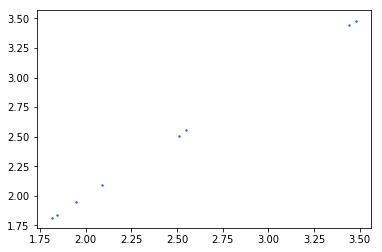

In [13]:
mapX_train = [x[0] for x in maps_train]
mapy_train = [x[1] for x in maps_train]
plt.scatter(mapX_train, mapy_train, s=2)

In [14]:
maps = []
for i in active_L_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps.append(prediction)

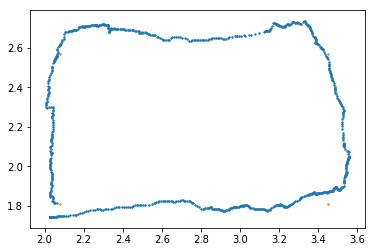

In [15]:
mapX = [x[0] for x in maps]
mapy = [x[1] for x in maps]
plt.scatter(mapX, mapy, s=2)
plt.scatter(room_x, room_y, s=2)

In [16]:
l_maps = []
for i in active_long_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    l_maps.append(prediction)

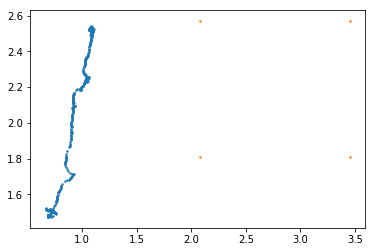

In [17]:
mapX_l = [x[0] for x in l_maps]
mapy_l = [x[1] for x in l_maps]
plt.scatter(mapX_l, mapy_l, s=2)
plt.scatter(room_x, room_y, s=2)

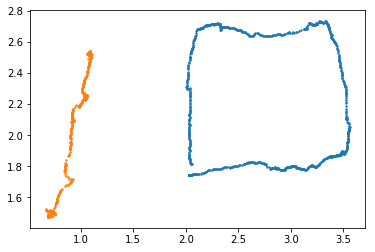

In [18]:
plt.scatter(mapX, mapy, s=2)
plt.scatter(mapX_l, mapy_l, s=2)

In [ ]:
maps = []
for i in active_L_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps.append(prediction)

In [21]:
V5.keys()

dict_keys(['active_long_table_slide_DOA', 'active_long_table_slide_matrix', 'cp_list', 'active_L_table_slide_matrix', 'active_L_table_slide_DOA'])